In [1]:
from numpy import *
from numpy.random import randint as rand
import matplotlib.pyplot as plt

In [2]:
# Maze generation algorithm from wikipedia



def maze(width=81, height=51, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1]))) # number of components
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2))) # size of components
    # Build actual maze
    Z = zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2 # pick a random position
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z


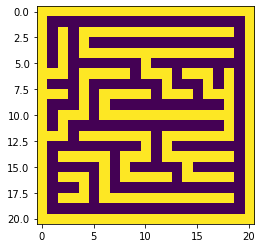

In [3]:
lab=maze(width=20,height=20)
plt.imshow(lab)

In [4]:
def pick_random_point():
    global lab
    
    go_on=True
    while go_on:
        x,y=random.randint(shape(lab)[0]),random.randint(shape(lab)[1])
        if lab[x,y]==False: # valid corridor site
            go_on=False   
    return([x,y])

def pick_target():
    global target
    target=zeros(shape(lab))

    x,y=pick_random_point()
    target[x,y]=1


In [5]:
pick_target()

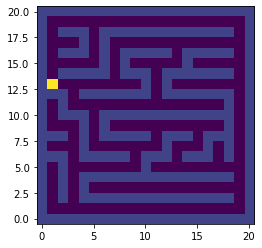

In [6]:
plt.imshow(lab+target*5,origin='lower')
plt.show()

In [8]:
direction=[ array([0,1]), array([1,0]), array([0,-1]), array([-1,0])]

Q=zeros([4,shape(lab)[0],shape(lab)[1]])

def do_random_walk(start,steps):
    global direction, lab
    pos=start
    positions=zeros([steps,2],dtype='int')
    for j in range(steps):
        a=random.randint(4)
        newpos=pos+direction[a]
        if lab[newpos[0],newpos[1]]==False: # valid corridor site
            pos[0]=newpos[0] # take the step!
            pos[1]=newpos[1]
        positions[j,:]=pos
    return(positions)

def plot_random_walk(walk):
    global lab
    
    steps=shape(walk)[0]
    themap=lab.astype('int')
    for j in range(steps):
        themap[walk[j][0],walk[j][1]]=2
    plt.imshow(themap,origin='lower')
    plt.show()

In [9]:
alpha=0.2
epsilon=0.7
gamma=0.9
skipsteps=1000
mywalk=do_random_walk(array([1,1]),500000)

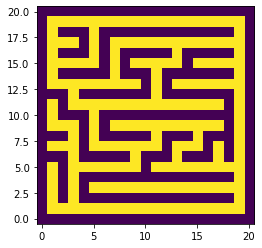

In [10]:
plot_random_walk(mywalk)

In [11]:
direction=[ array([0,1]), array([1,0]), array([0,-1]), array([-1,0])]

Q=zeros([4,shape(lab)[0],shape(lab)[1]])
epsilon=0.2

def do_Q_random_walk(start,steps):
    global direction, lab, Q, Qsave, skipsteps, target, epsilon, gamma, alpha
    
    pos=start
    positions=zeros([steps,2],dtype='int')

    Qsave=zeros([int(steps/skipsteps),4,shape(lab)[0],shape(lab)[1]])

    for j in range(steps):
        oldpos=pos
        if random.random()<epsilon:
            a=random.randint(4) # a random step
        else:
            a=argmax(Q[:,pos[0],pos[1]]) # pick best move
        newpos=pos+direction[a]
        if lab[newpos[0],newpos[1]]==False: # valid corridor site
            pos[0]=newpos[0] # take the step!
            pos[1]=newpos[1]
        if target[pos[0],pos[1]]==1:
            reward=5
            pos=pick_random_point() # jump back to a random point!
        else:
            reward=-1
        Q[a,oldpos[0],oldpos[1]]+=alpha*\
        (reward + gamma*max(Q[:,pos[0],pos[1]]) - Q[a,oldpos[0],oldpos[1]]) 
        positions[j,:]=pos
        
        if j%skipsteps==0:
            Qsave[int(j/skipsteps),:,:,:]=Q
    return(positions)

def plot_random_walk(walk):
    global lab
    
    steps=shape(walk)[0]
    themap=lab.astype('int')
    for j in range(steps):
        themap[walk[j][0],walk[j][1]]=2
    plt.imshow(themap,origin='lower')
    plt.show()

In [12]:
alpha=0.2
epsilon=0.7
gamma=0.9
skipsteps=1000
mywalk_Q=do_Q_random_walk(array([1,1]),500000)

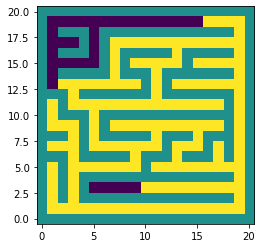

In [13]:
plot_random_walk(mywalk_Q)

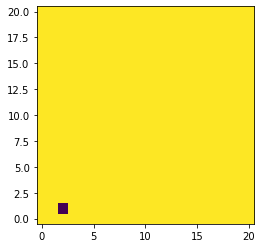

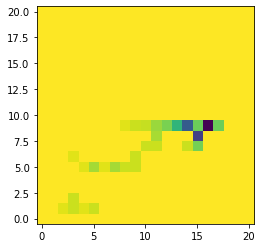

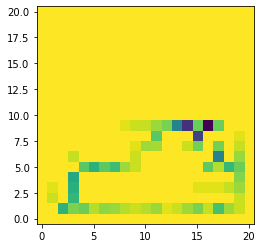

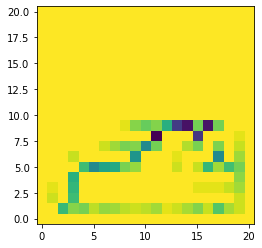

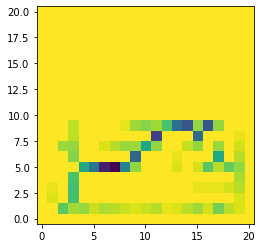

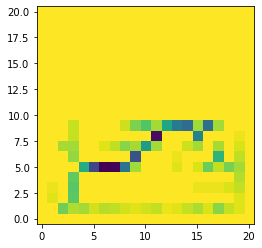

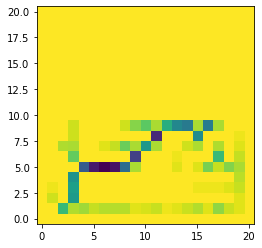

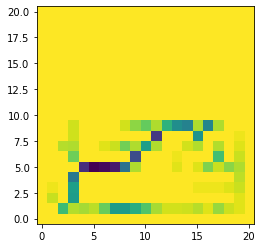

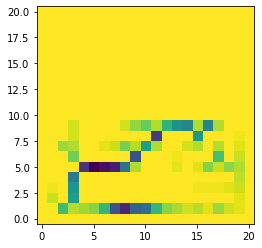

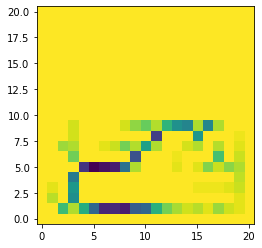

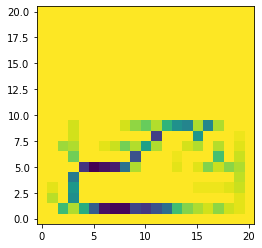

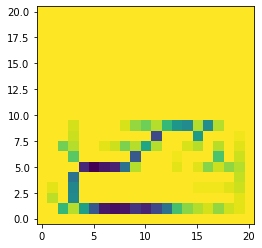

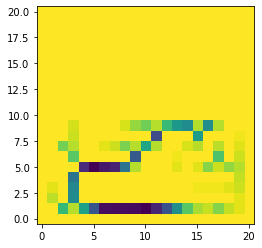

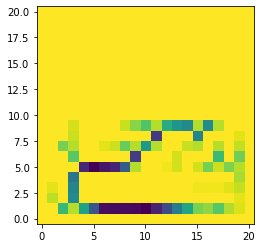

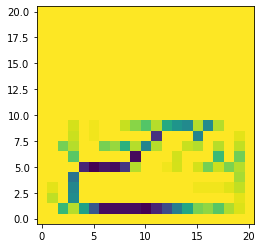

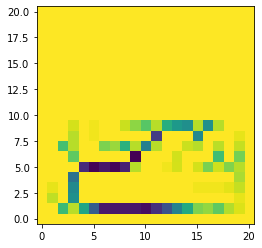

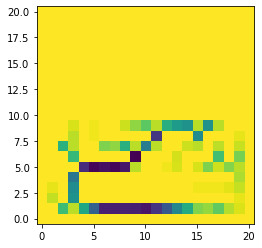

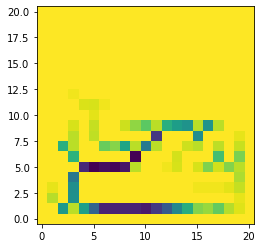

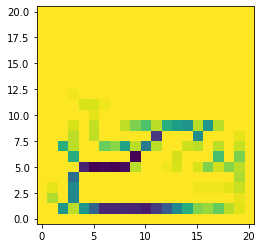

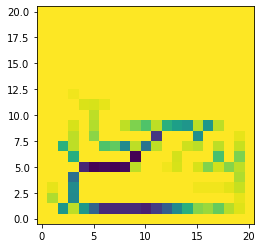

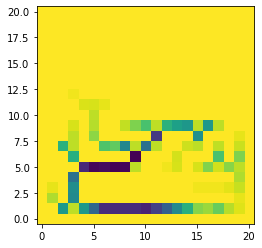

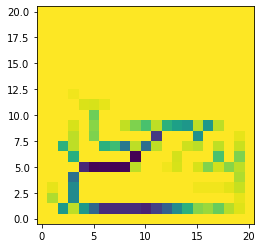

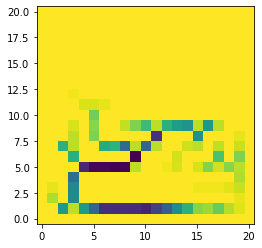

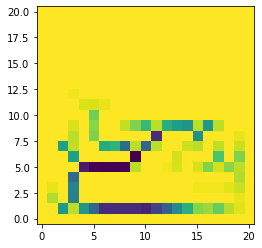

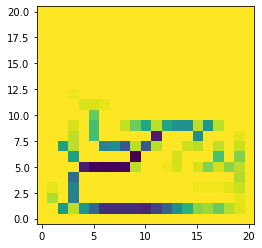

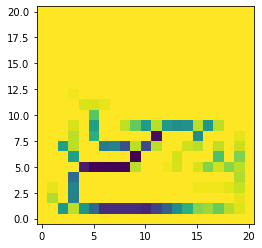

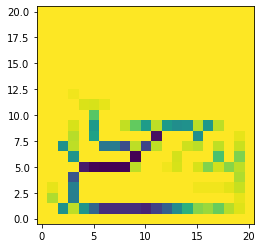

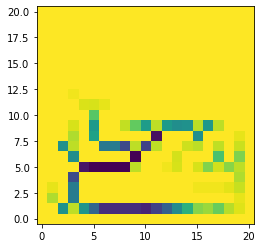

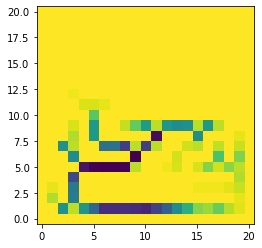

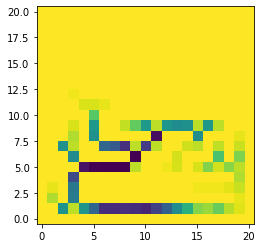

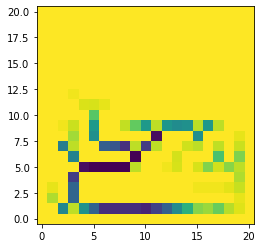

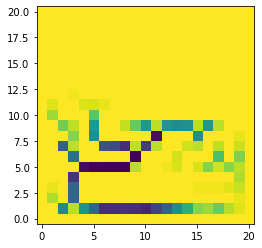

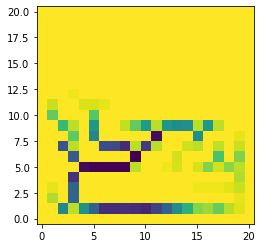

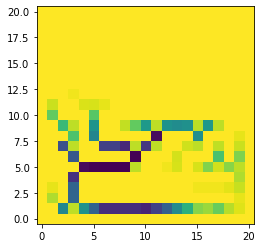

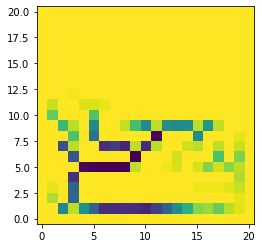

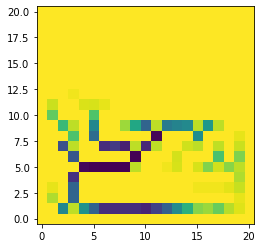

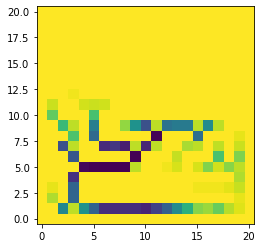

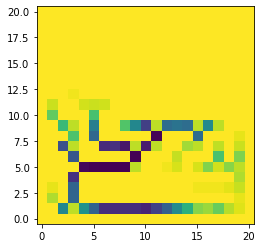

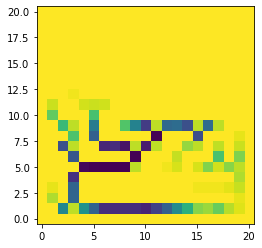

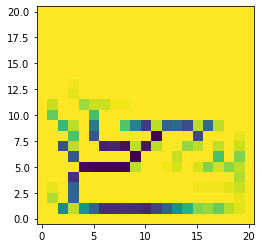

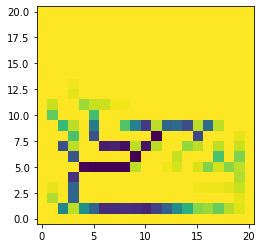

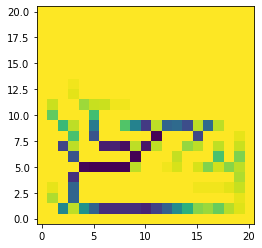

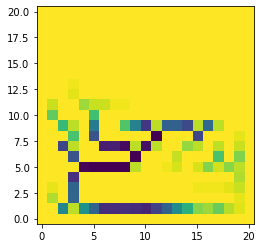

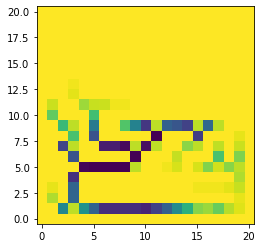

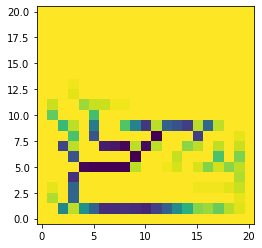

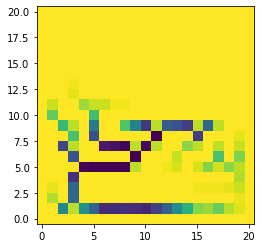

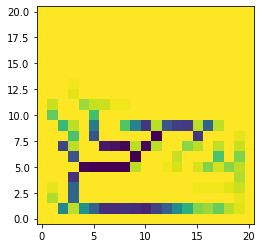

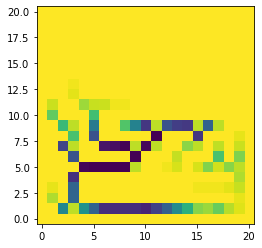

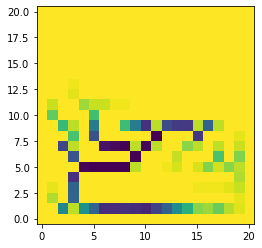

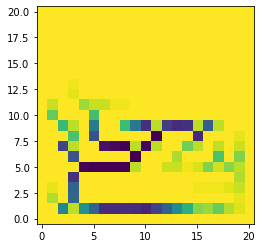

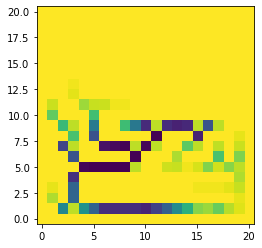

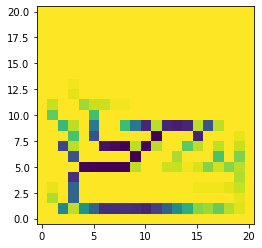

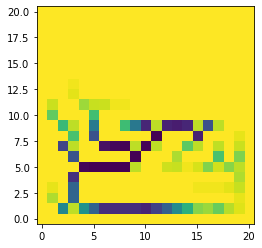

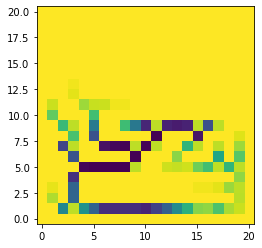

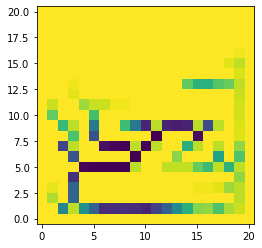

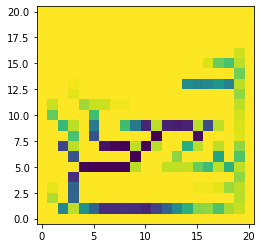

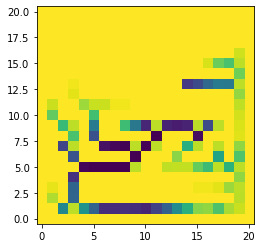

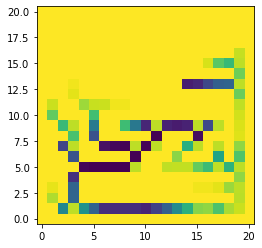

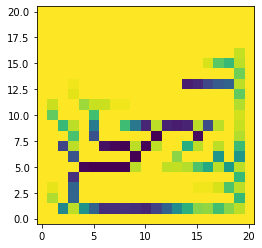

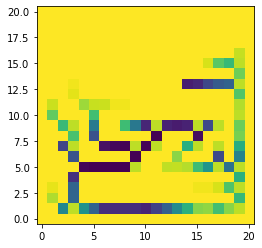

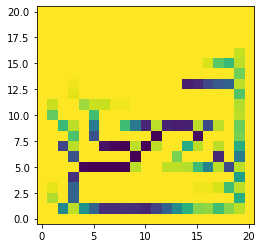

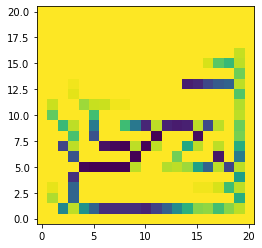

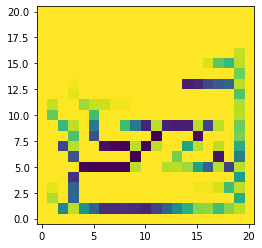

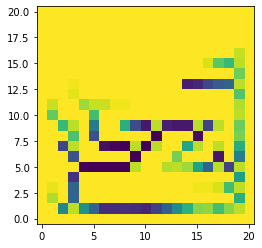

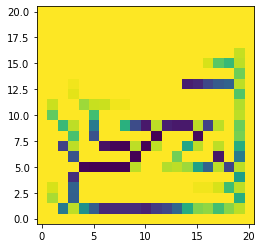

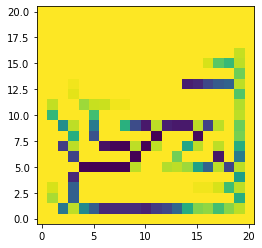

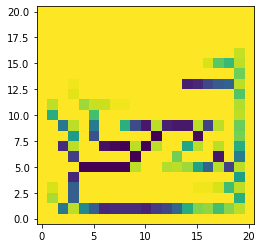

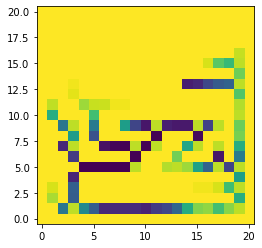

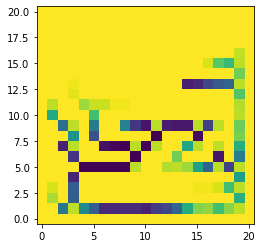

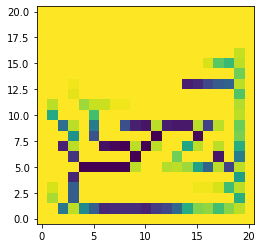

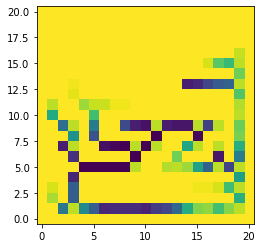

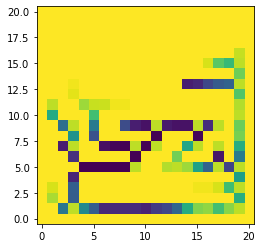

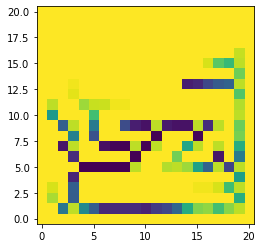

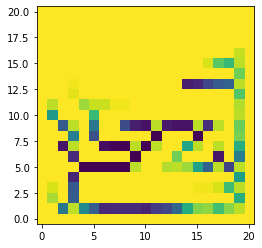

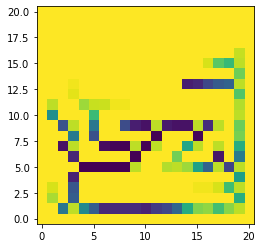

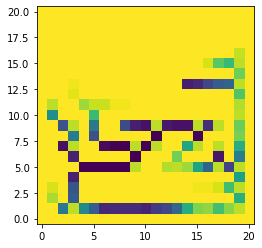

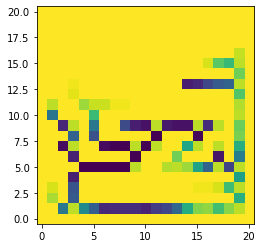

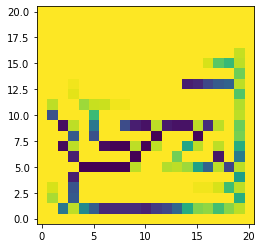

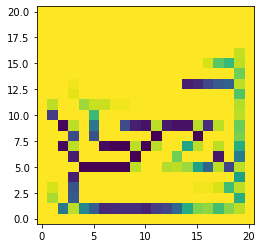

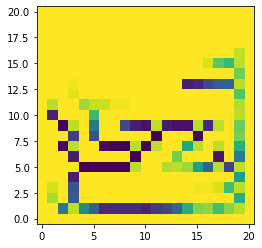

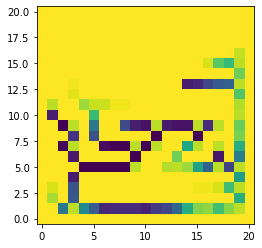

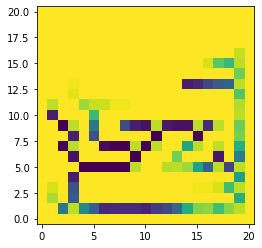

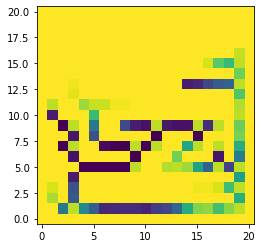

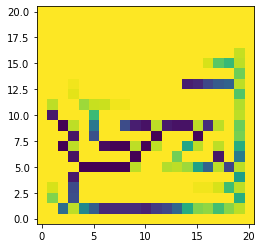

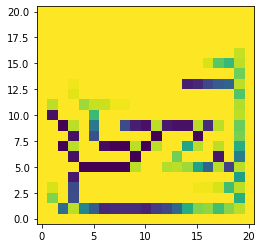

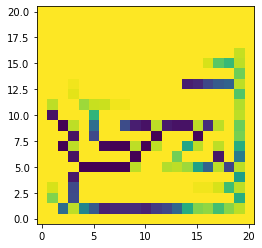

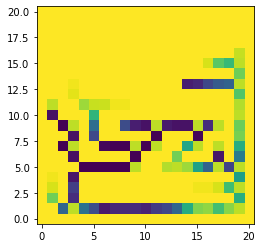

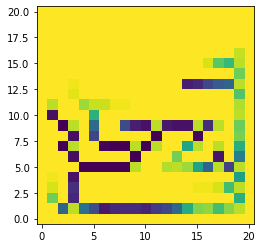

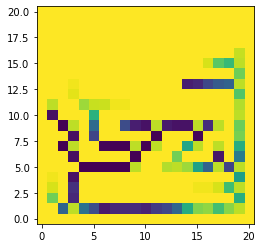

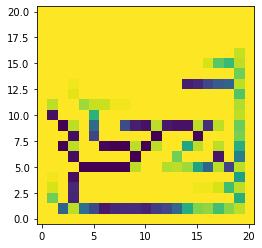

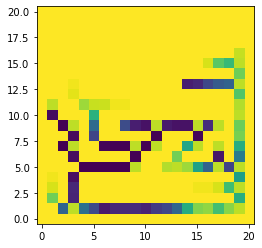

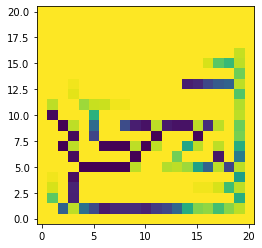

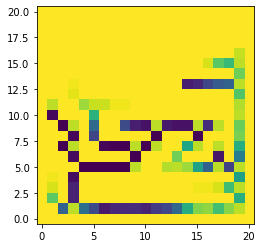

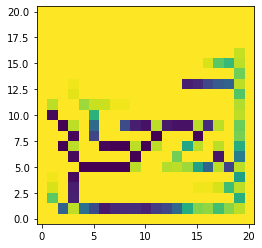

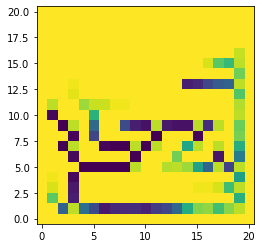

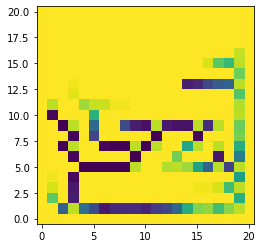

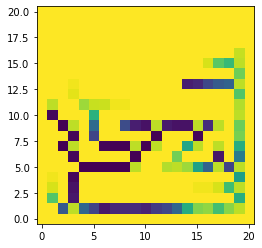

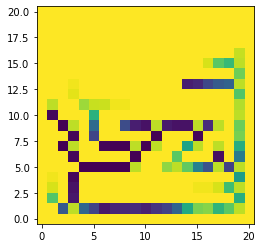

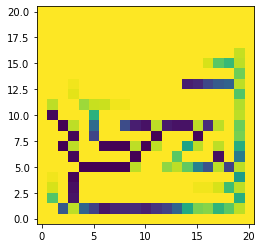

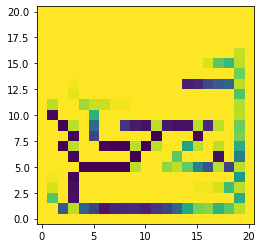

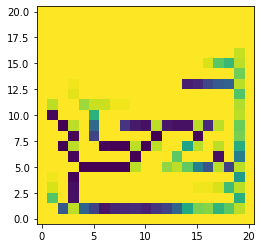

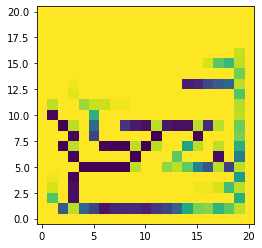

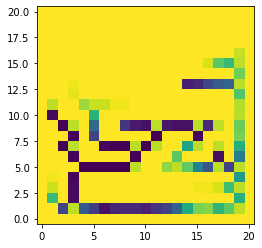

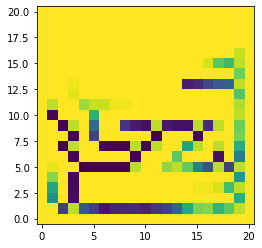

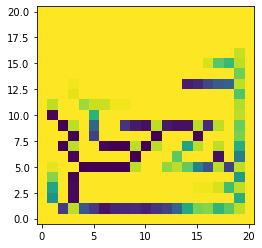

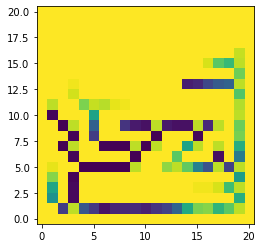

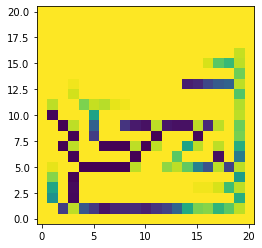

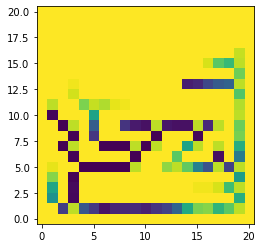

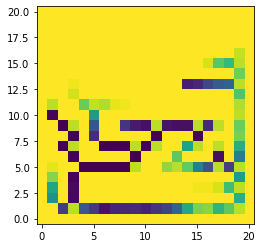

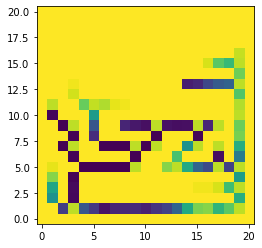

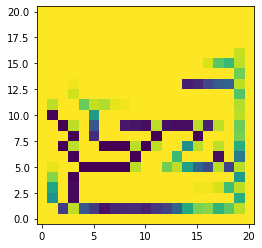

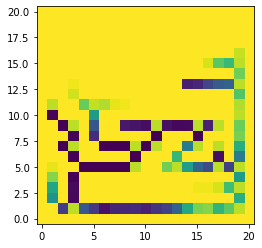

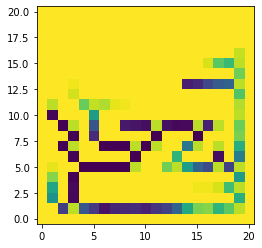

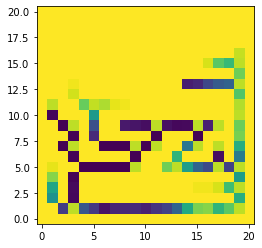

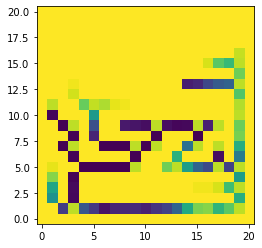

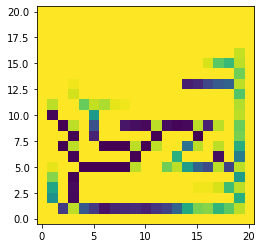

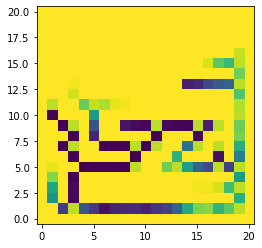

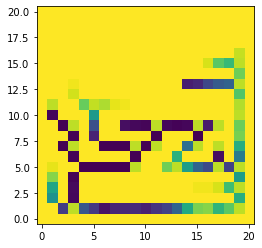

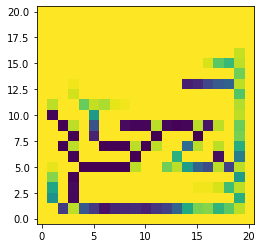

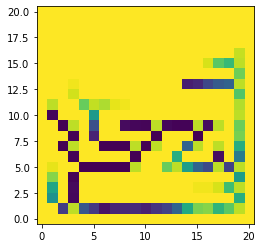

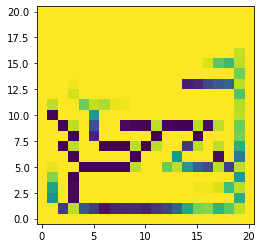

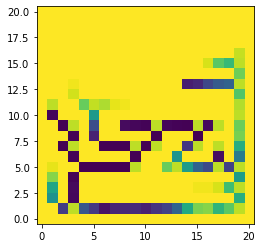

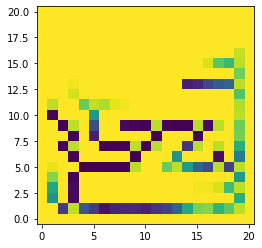

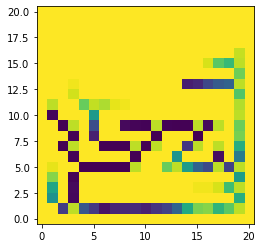

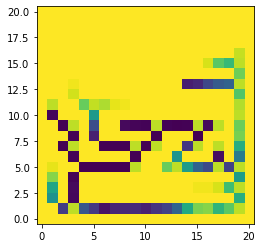

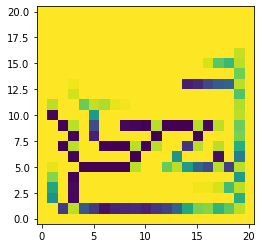

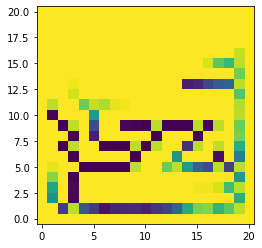

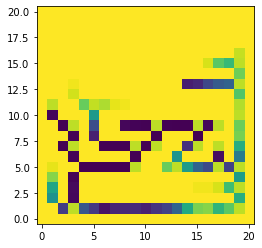

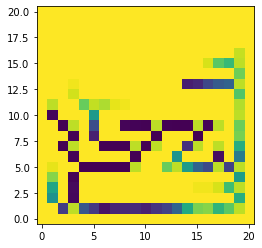

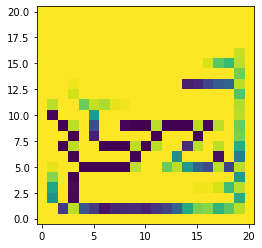

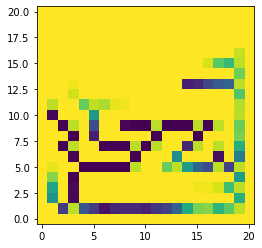

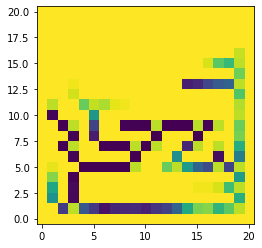

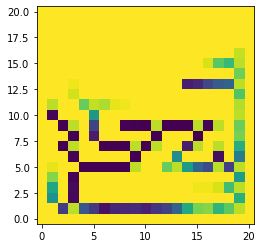

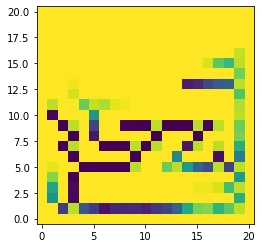

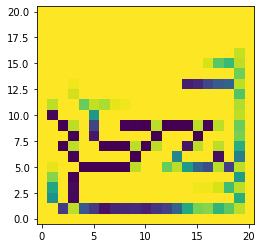

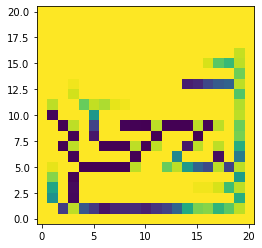

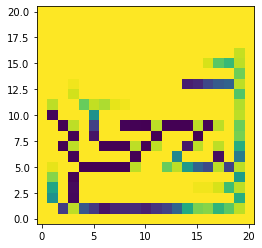

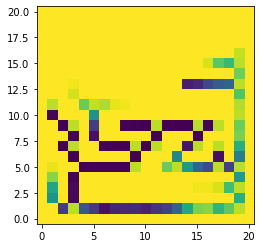

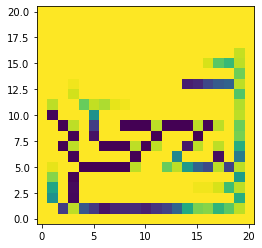

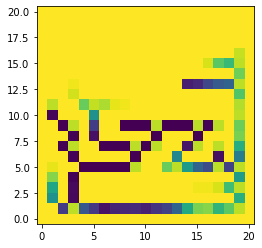

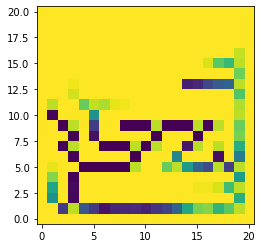

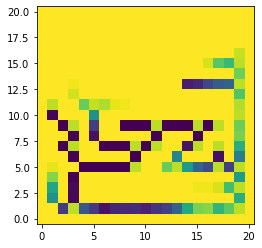

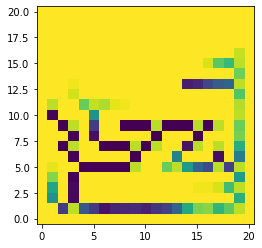

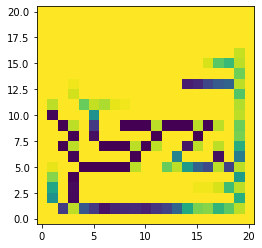

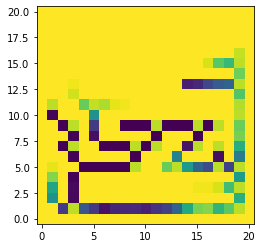

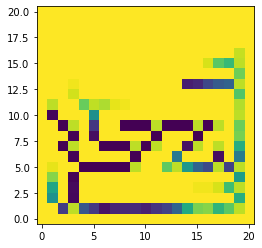

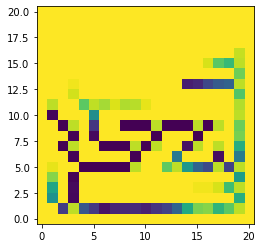

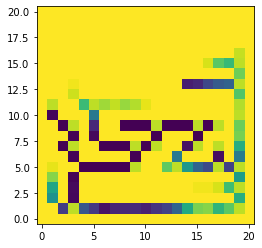

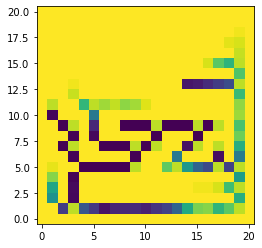

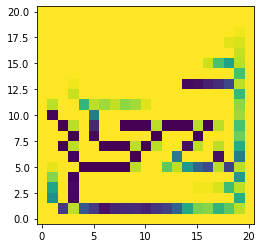

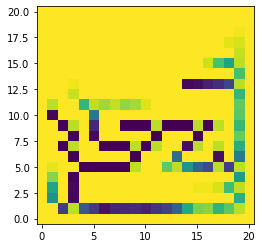

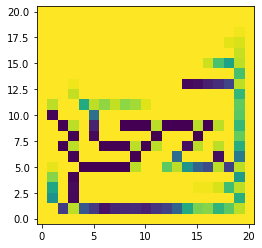

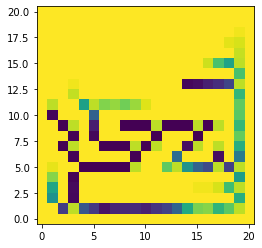

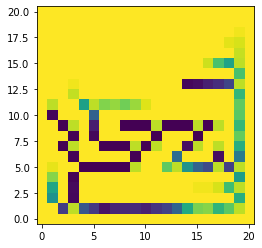

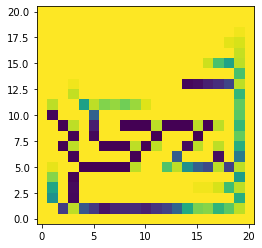

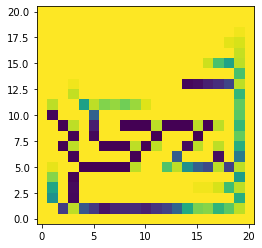

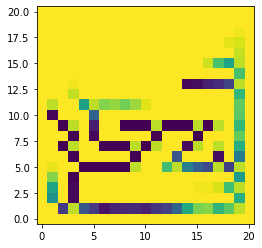

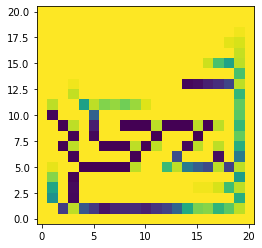

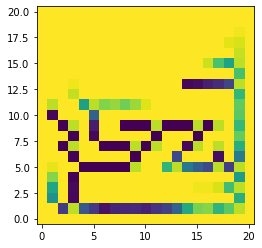

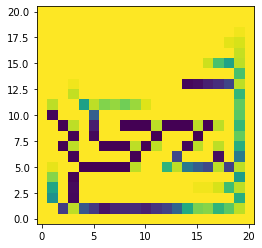

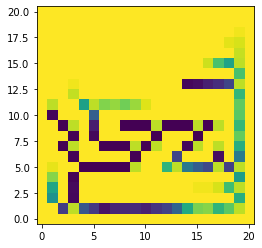

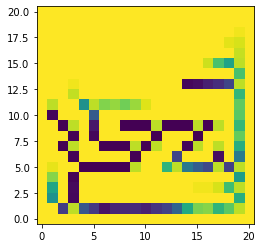

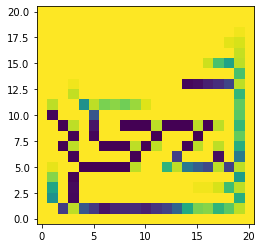

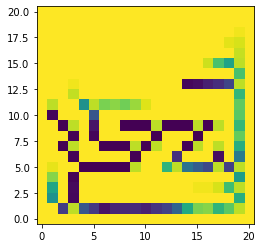

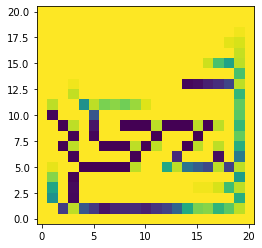

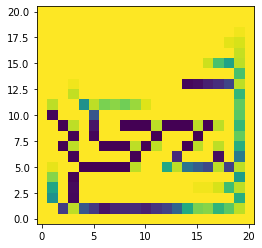

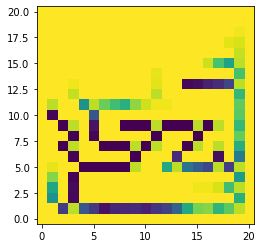

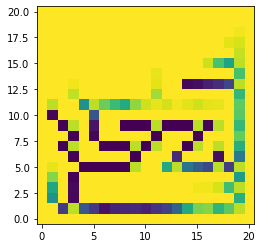

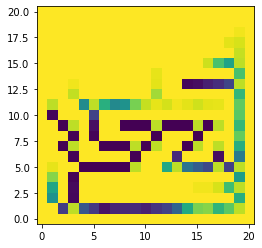

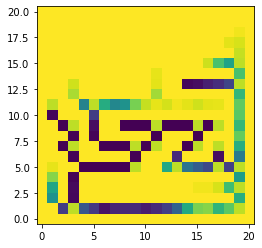

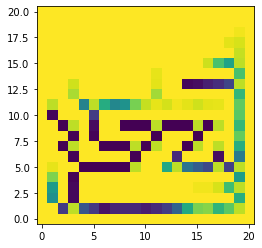

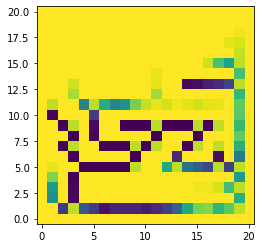

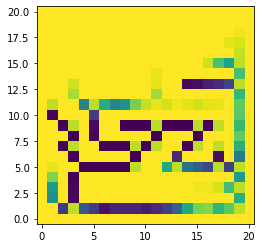

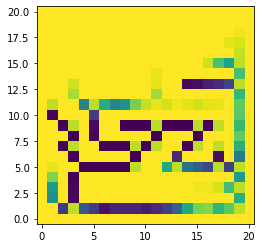

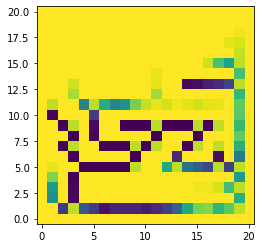

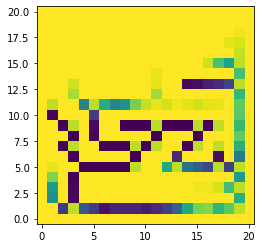

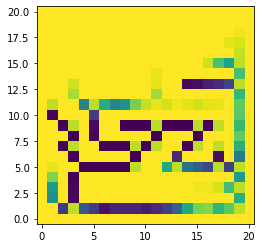

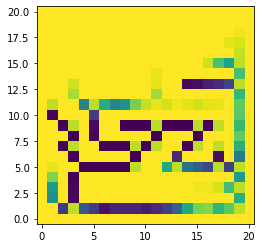

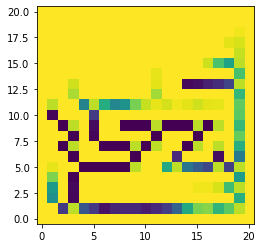

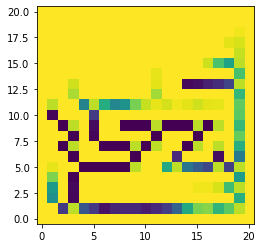

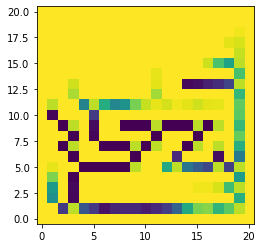

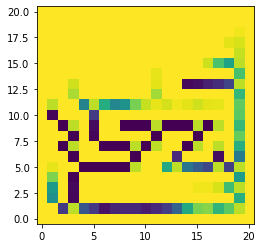

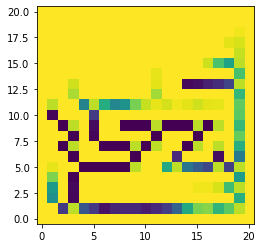

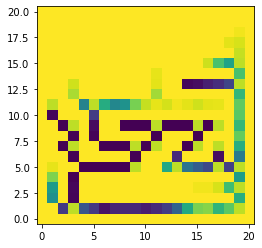

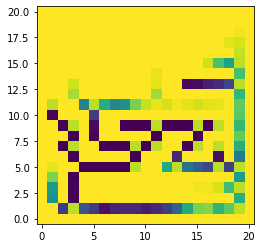

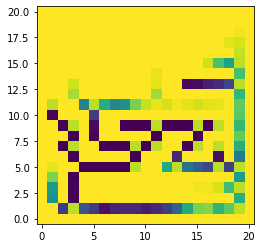

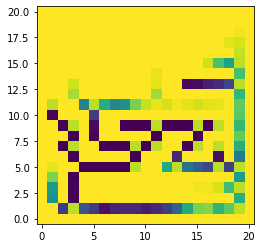

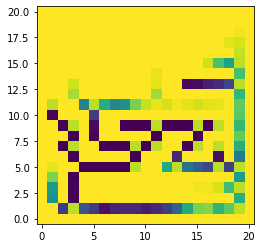

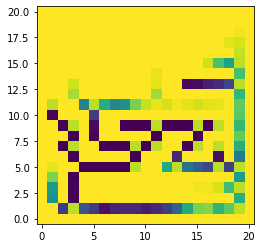

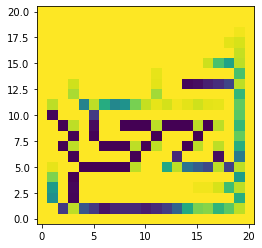

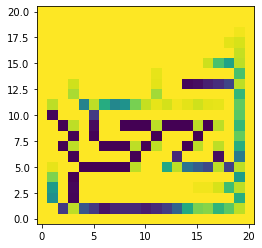

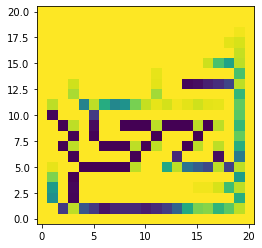

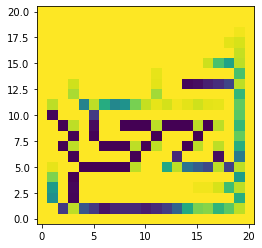

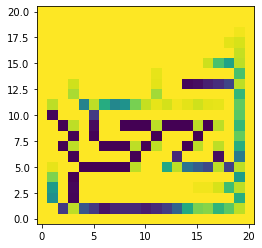

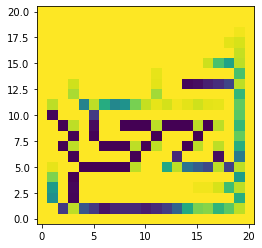

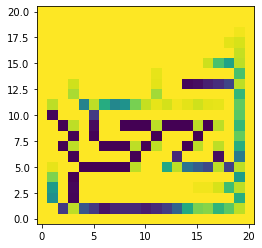

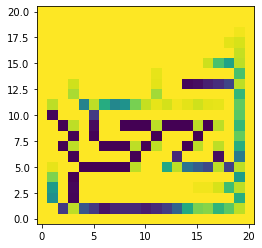

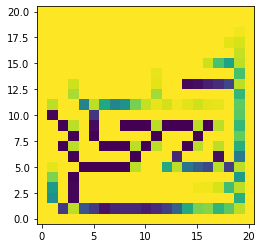

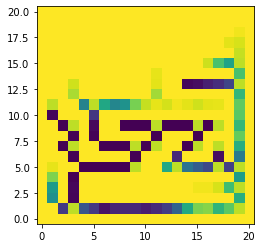

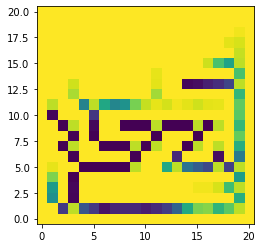

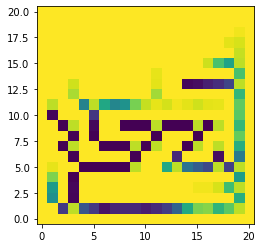

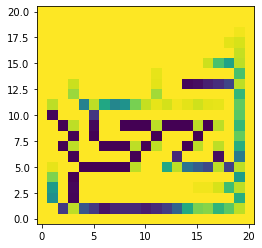

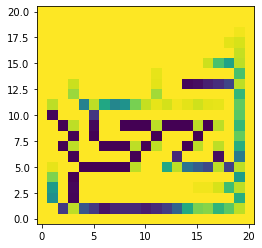

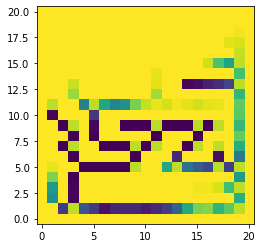

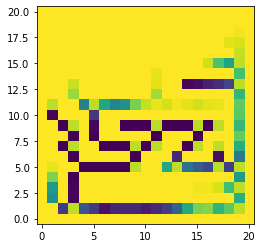

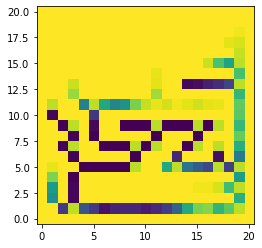

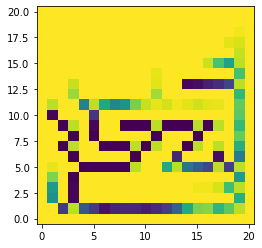

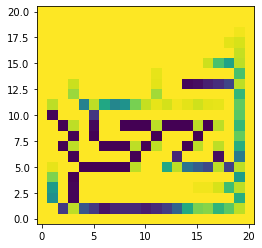

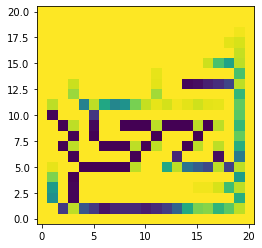

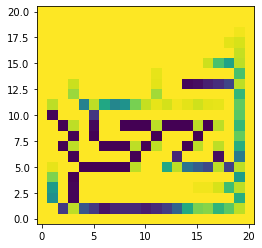

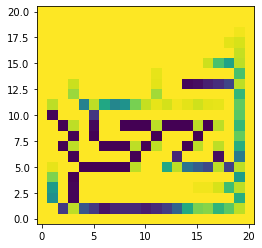

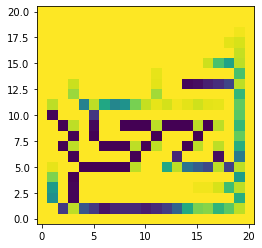

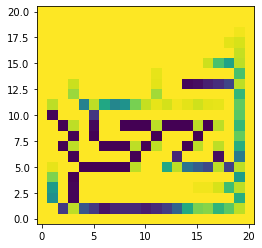

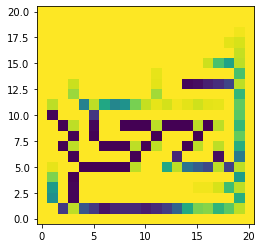

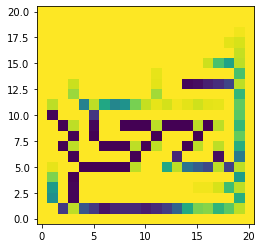

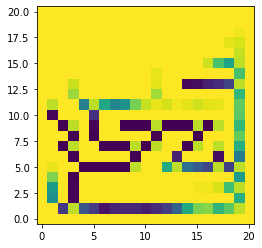

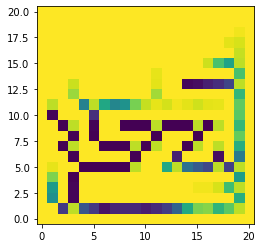

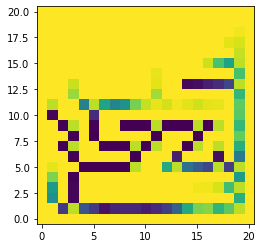

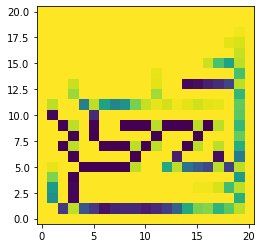

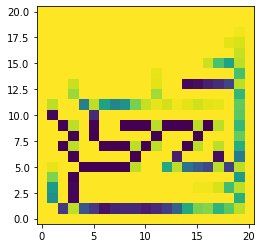

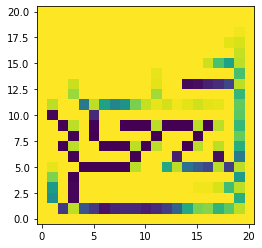

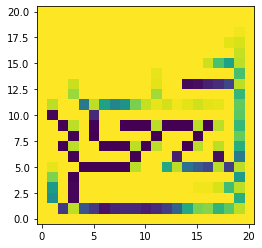

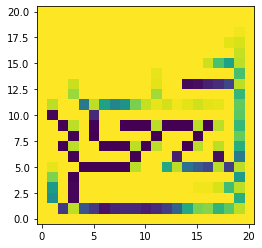

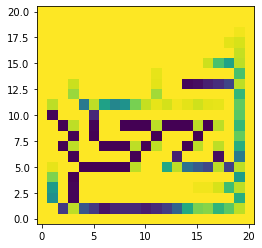

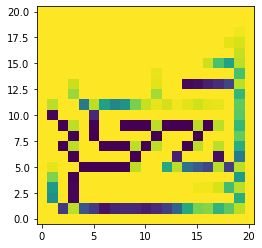

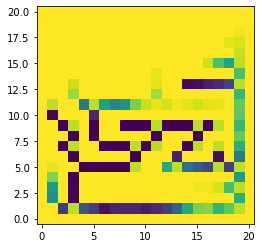

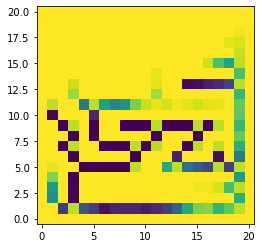

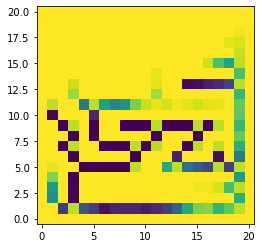

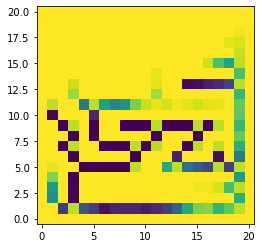

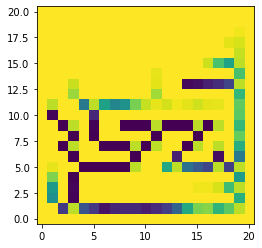

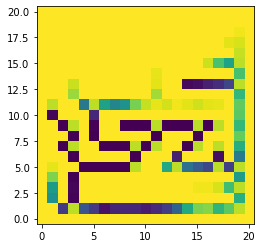

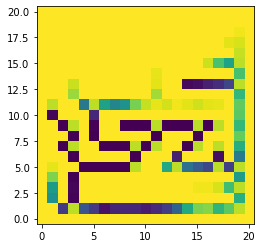

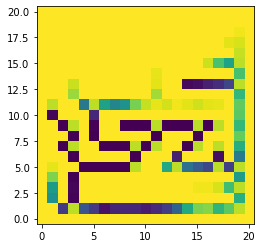

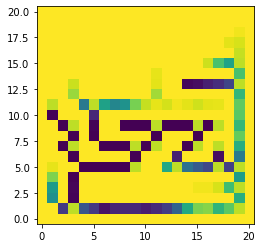

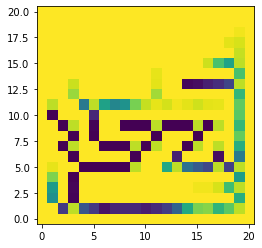

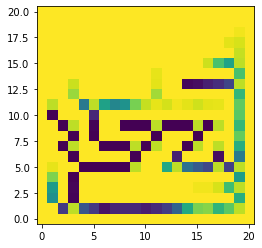

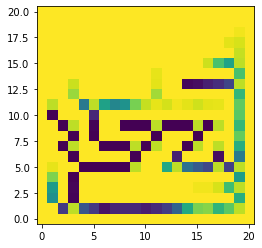

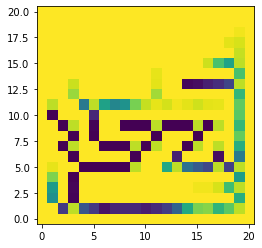

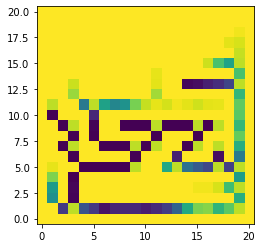

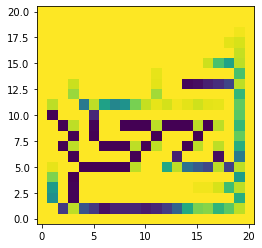

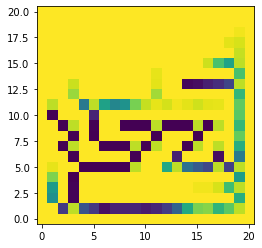

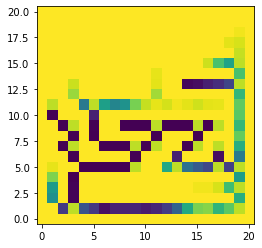

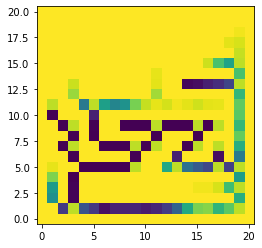

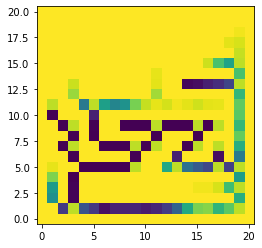

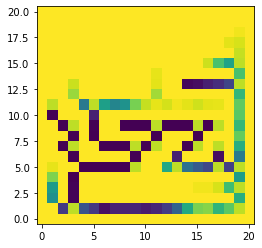

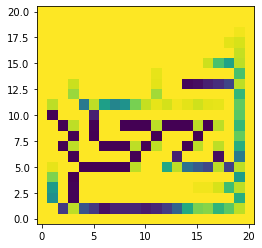

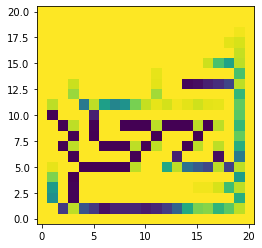

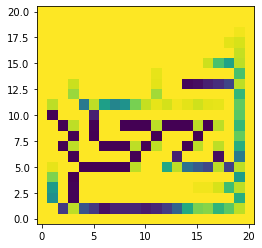

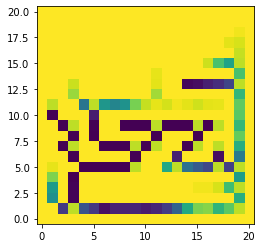

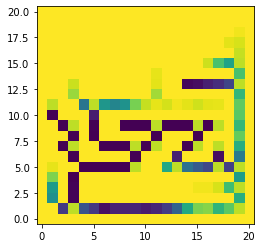

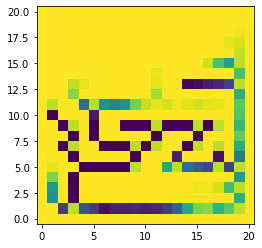

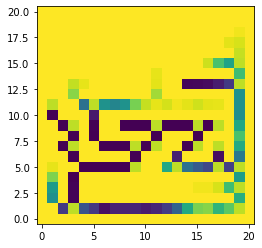

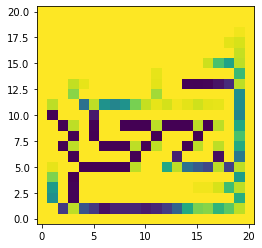

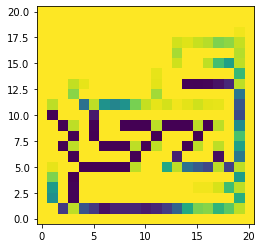

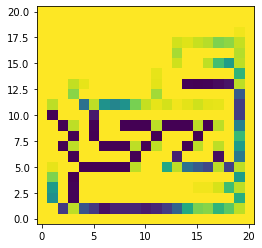

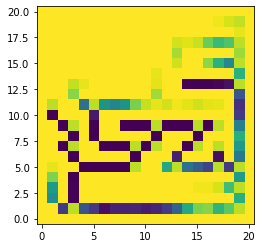

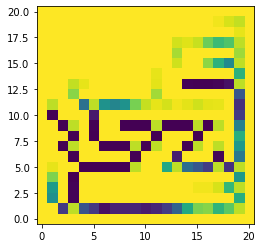

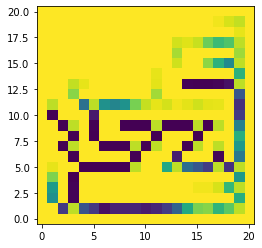

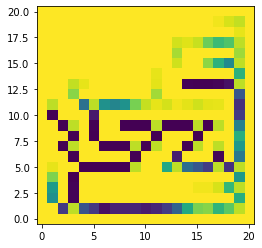

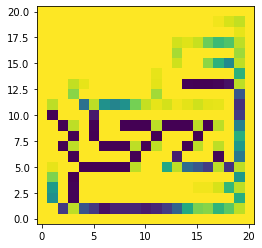

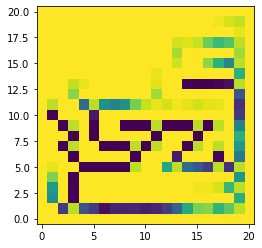

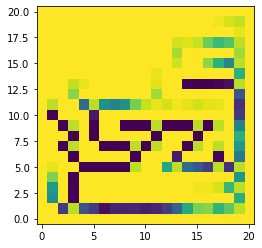

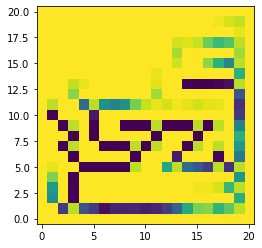

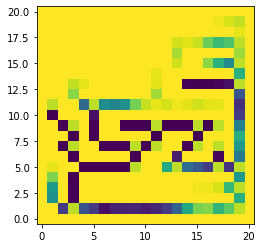

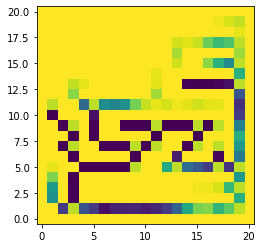

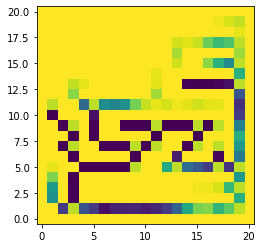

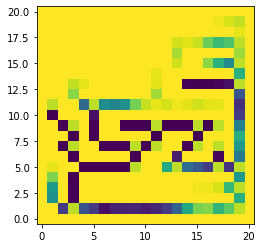

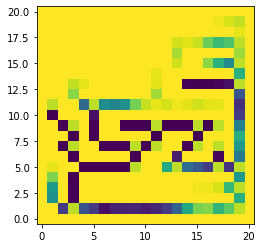

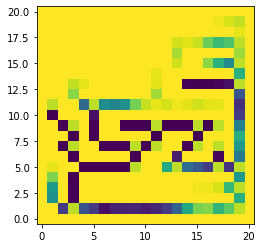

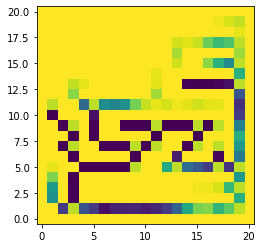

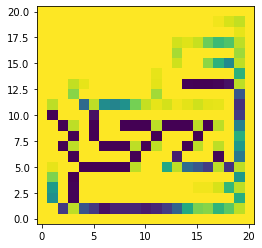

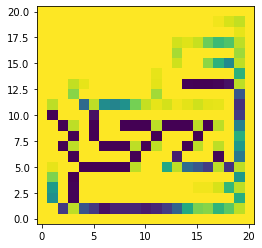

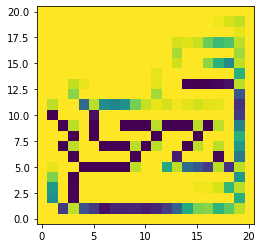

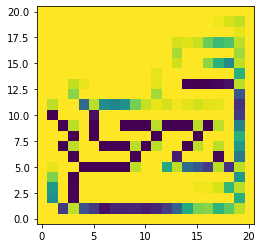

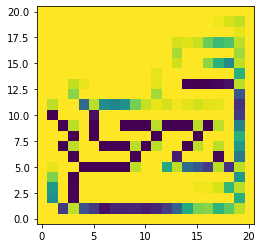

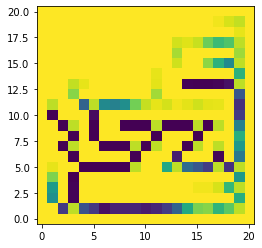

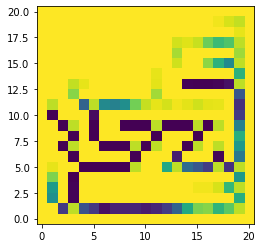

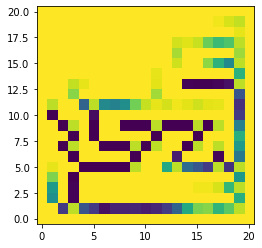

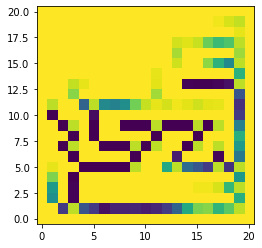

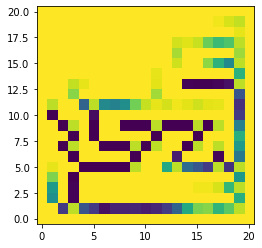

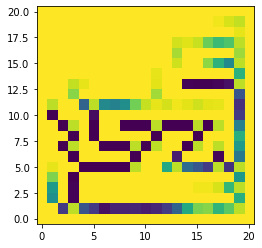

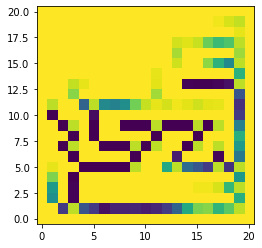

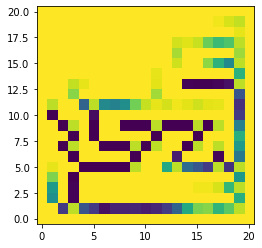

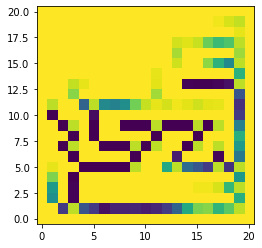

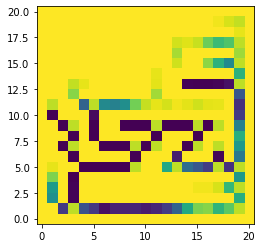

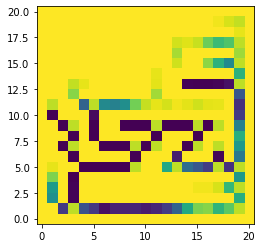

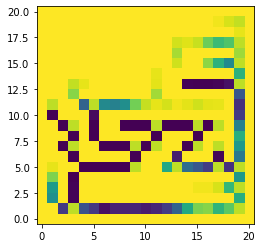

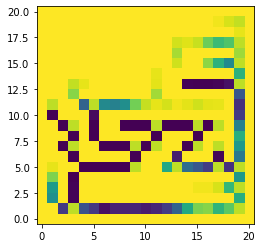

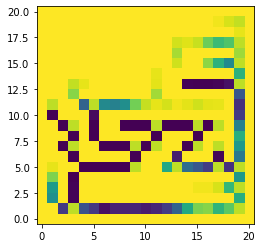

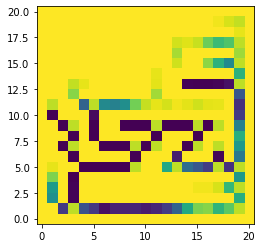

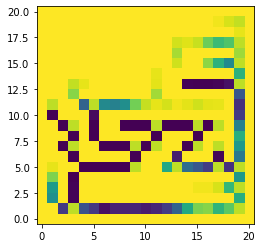

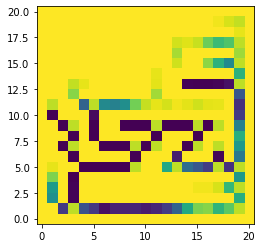

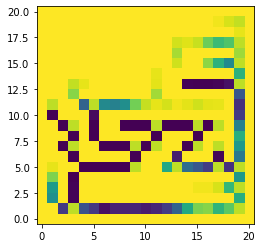

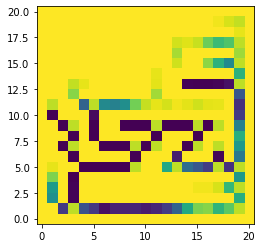

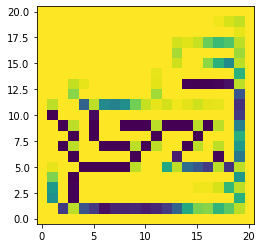

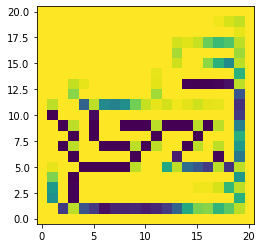

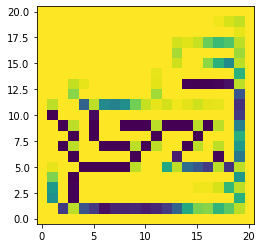

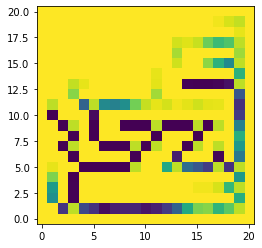

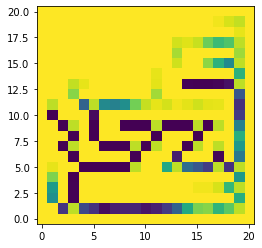

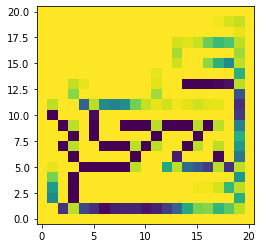

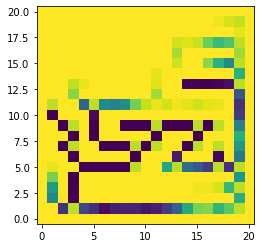

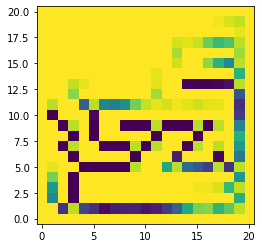

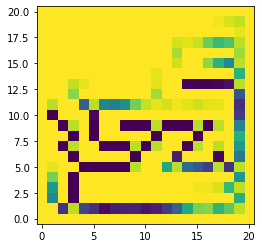

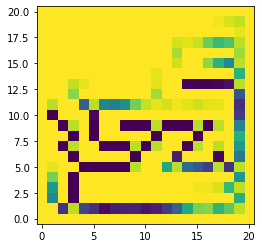

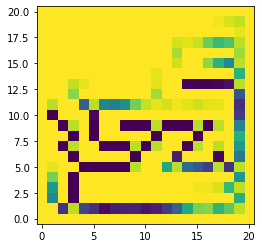

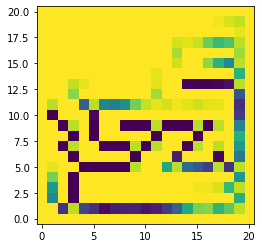

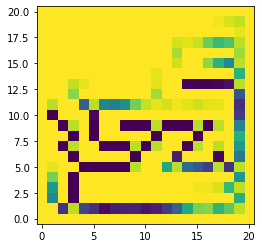

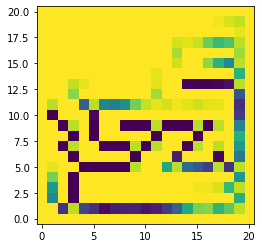

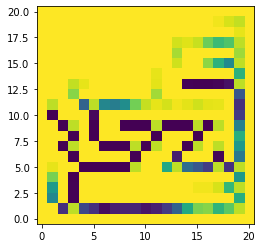

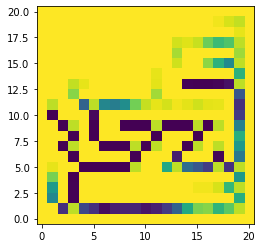

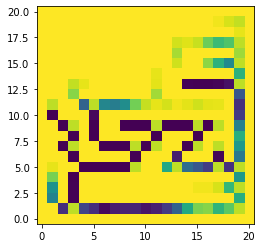

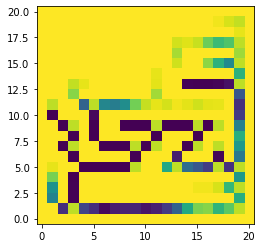

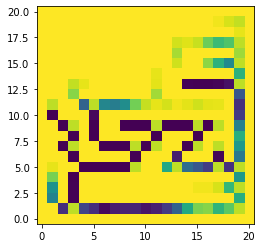

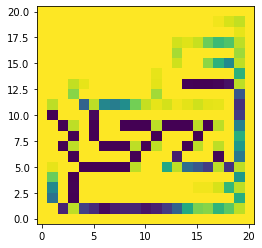

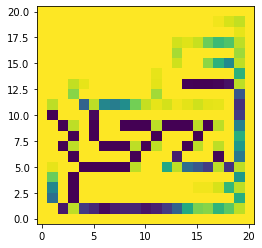

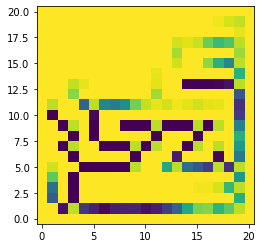

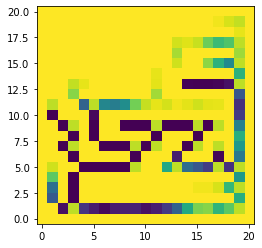

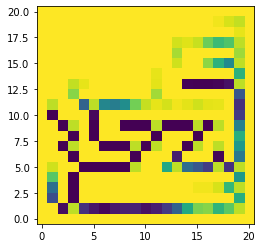

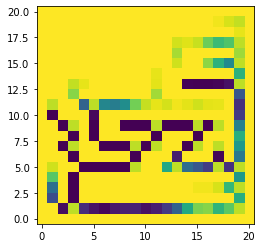

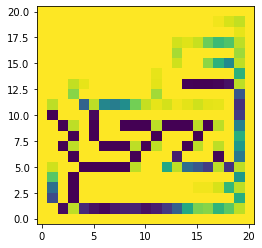

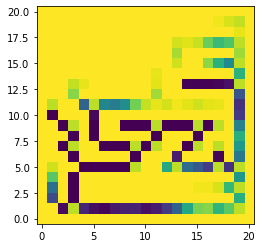

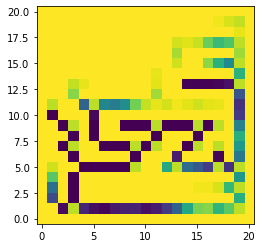

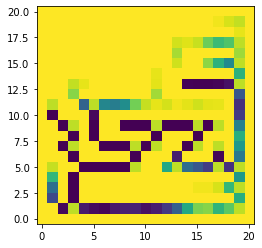

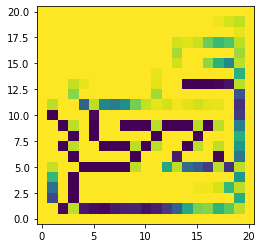

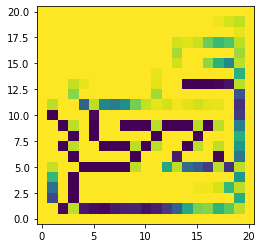

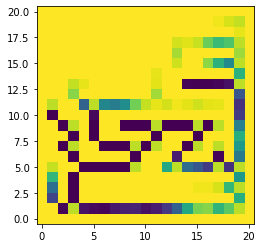

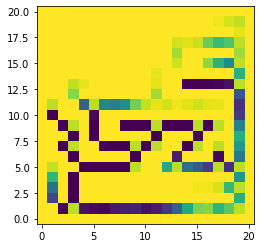

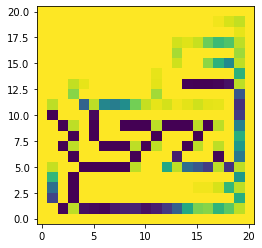

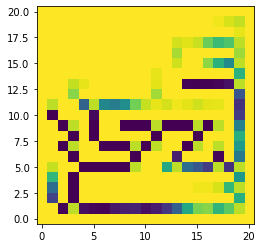

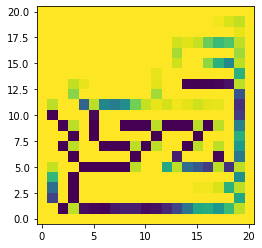

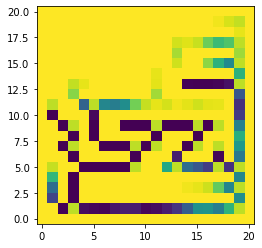

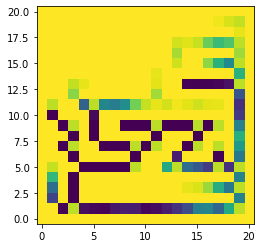

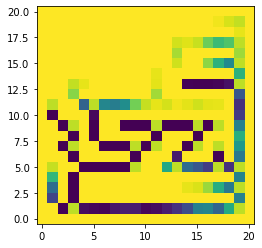

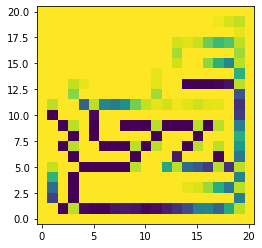

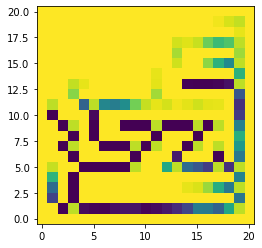

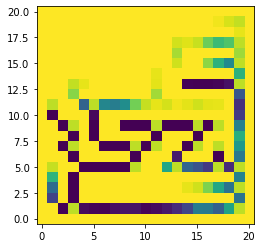

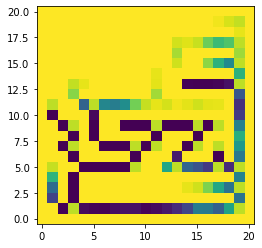

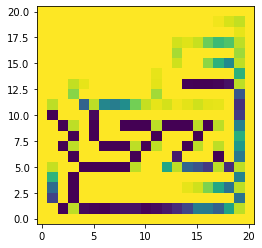

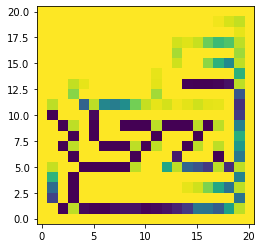

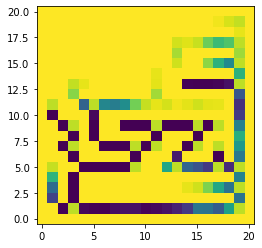

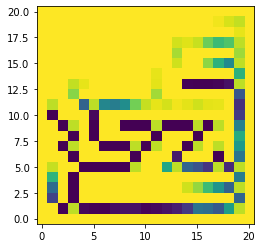

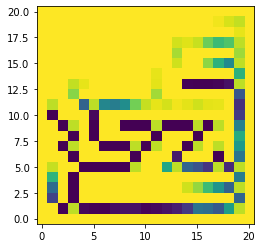

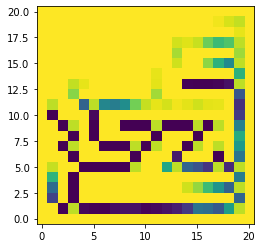

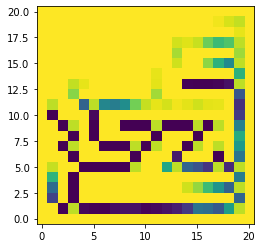

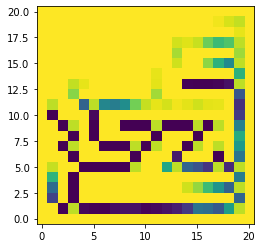

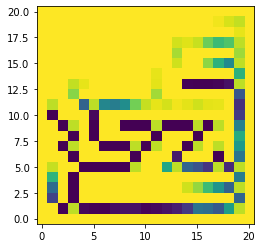

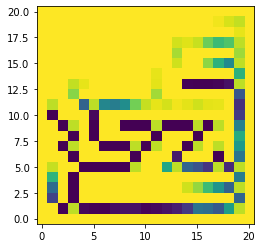

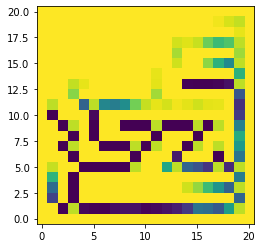

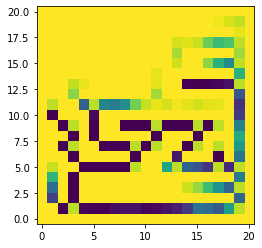

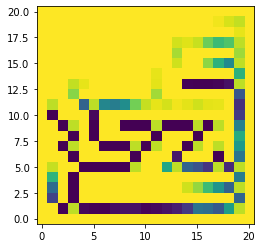

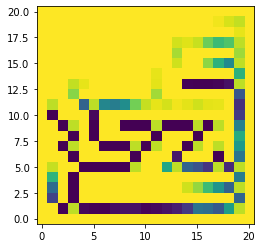

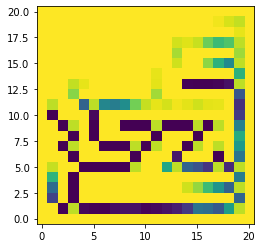

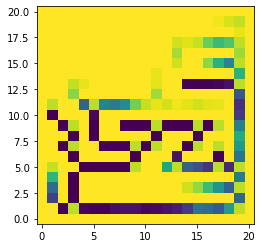

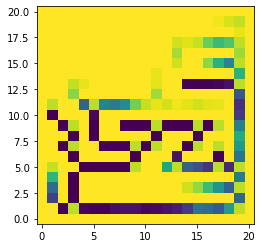

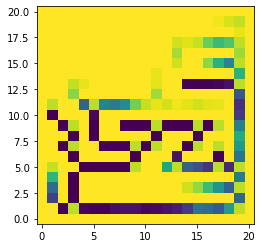

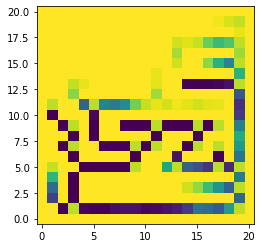

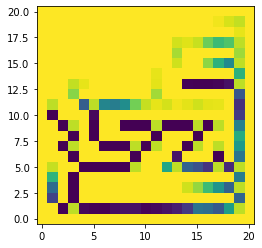

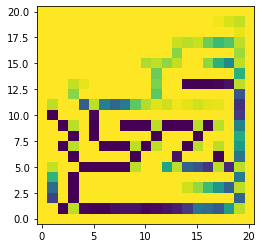

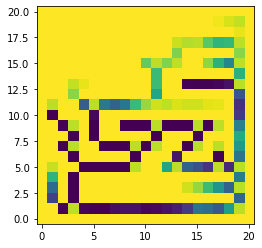

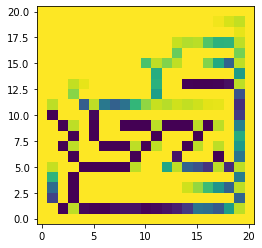

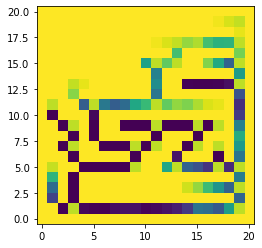

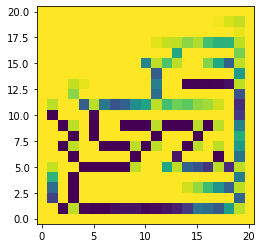

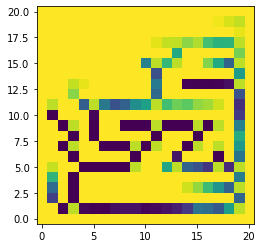

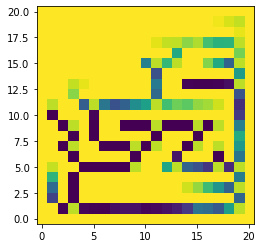

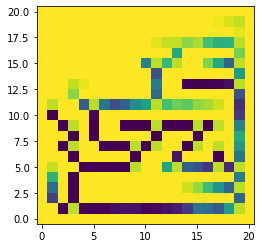

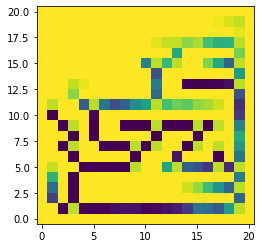

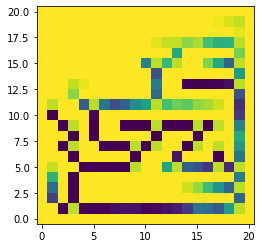

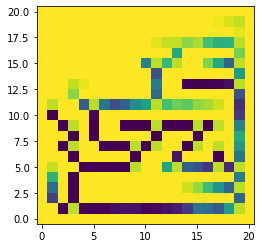

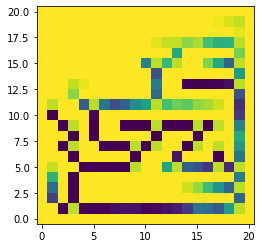

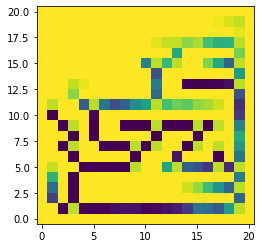

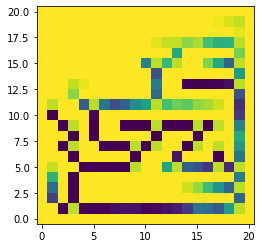

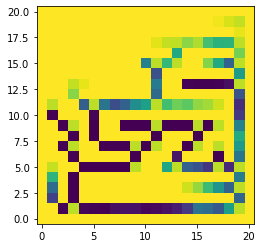

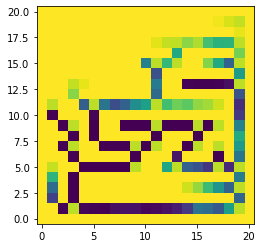

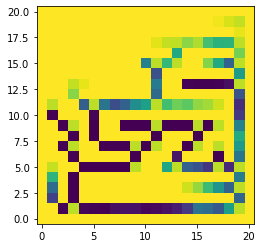

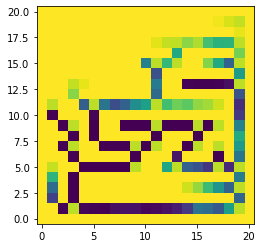

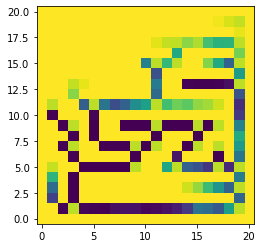

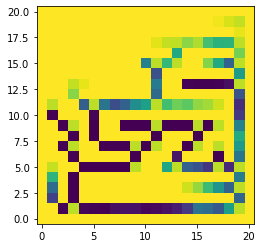

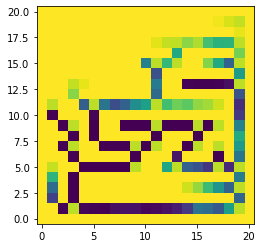

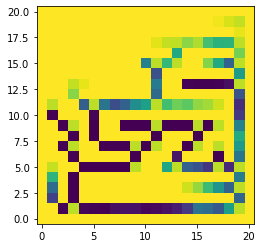

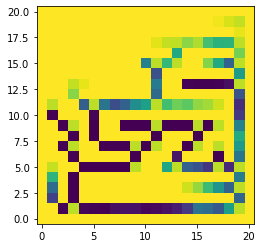

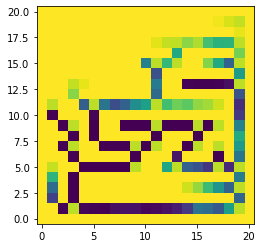

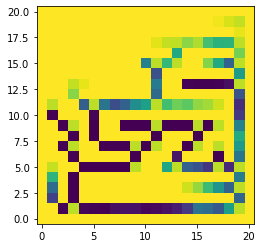

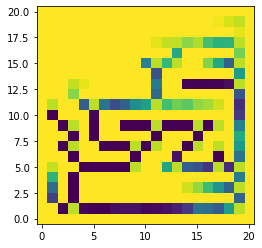

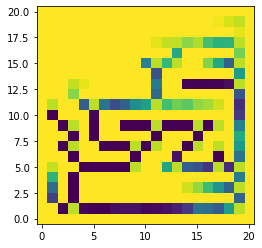

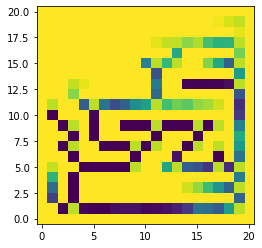

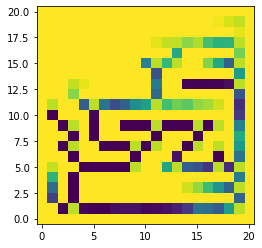

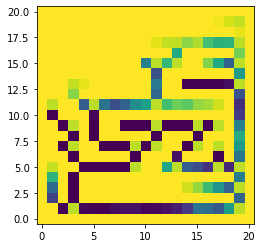

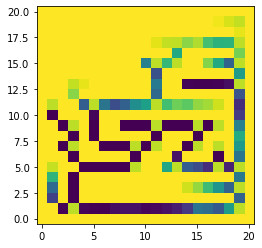

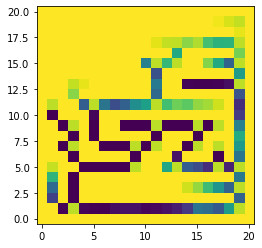

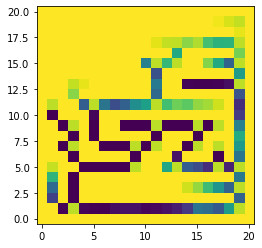

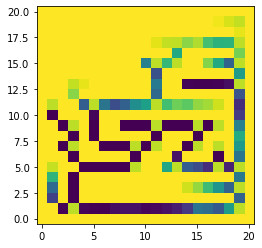

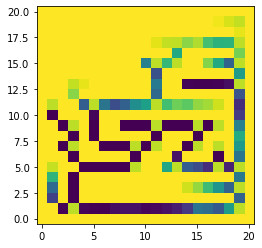

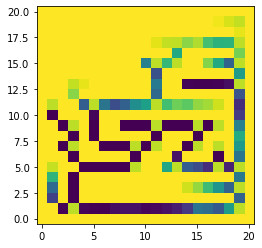

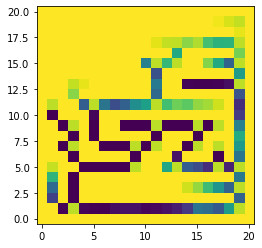

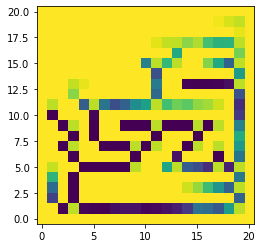

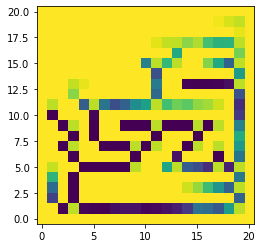

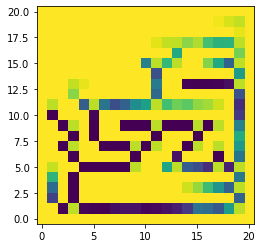

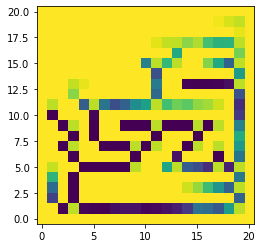

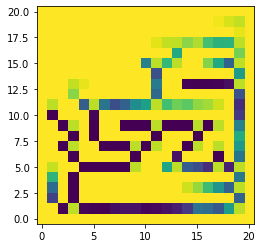

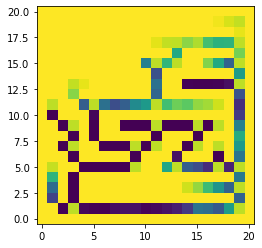

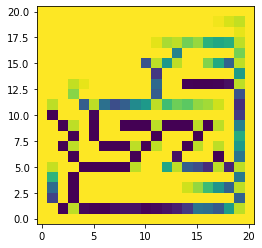

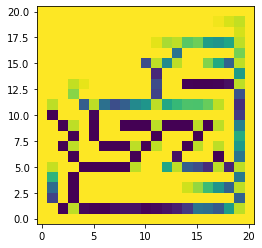

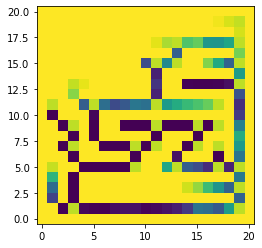

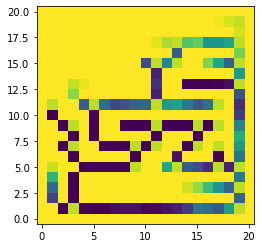

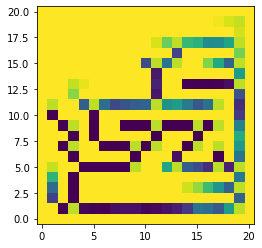

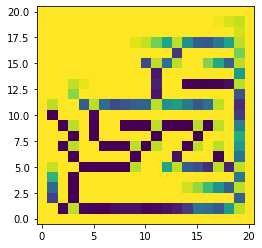

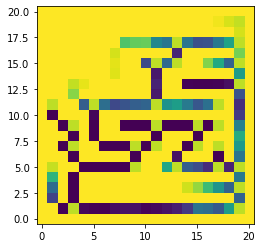

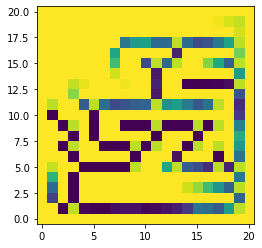

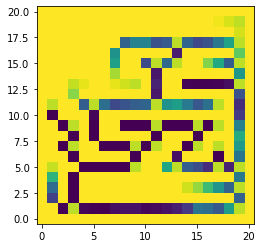

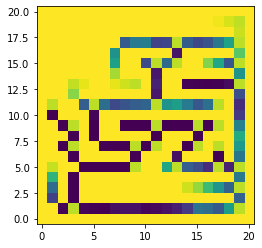

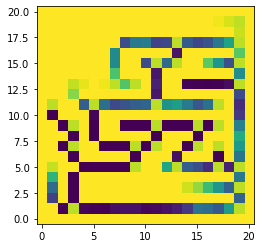

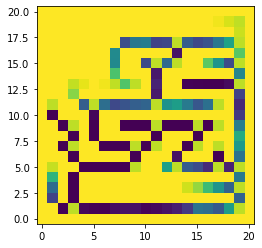

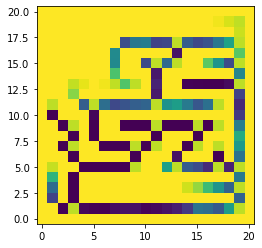

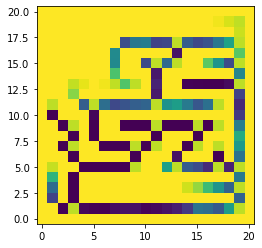

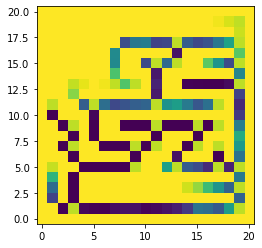

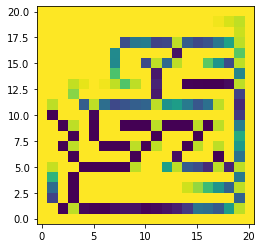

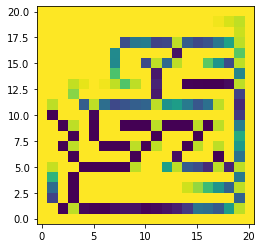

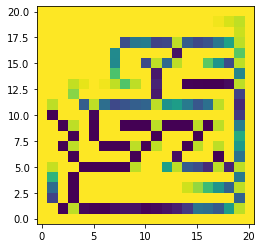

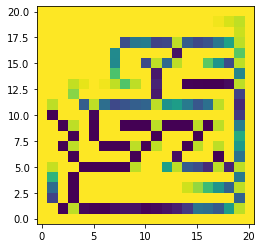

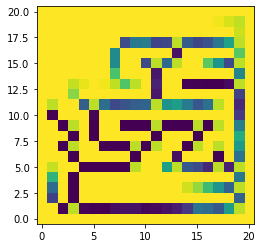

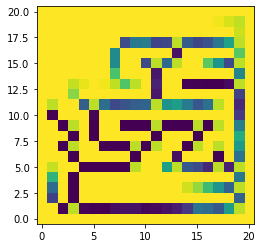

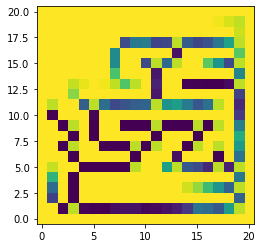

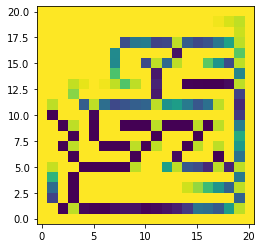

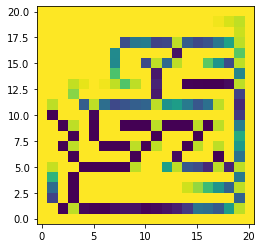

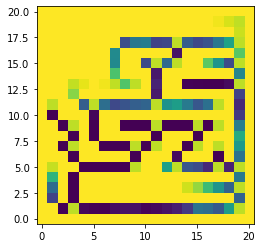

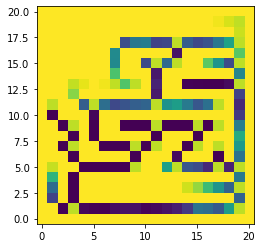

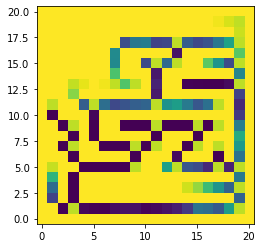

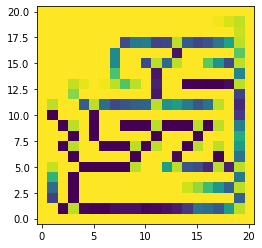

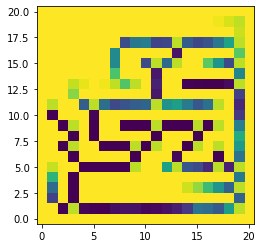

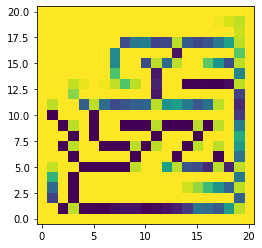

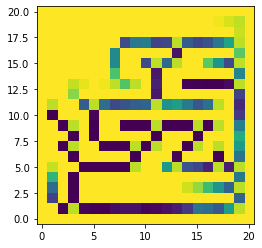

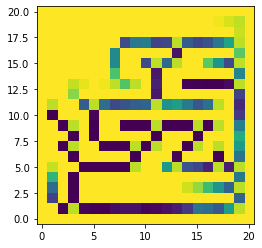

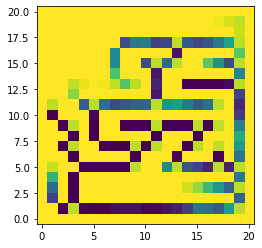

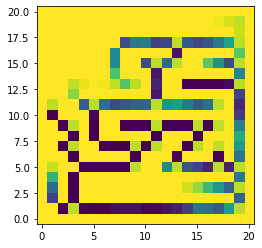

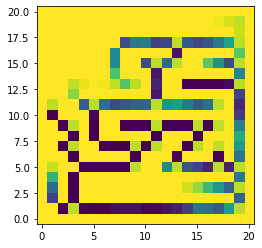

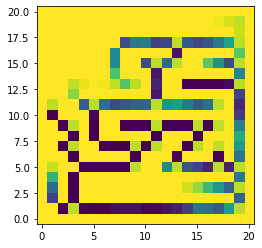

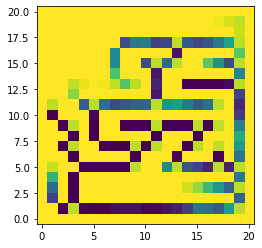

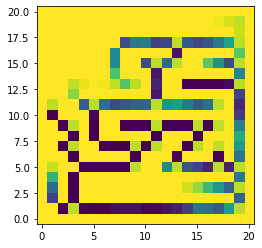

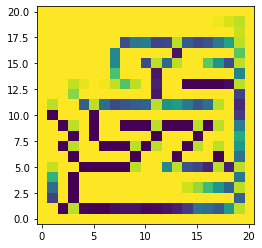

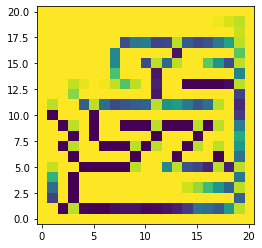

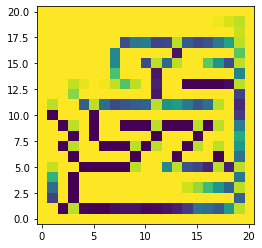

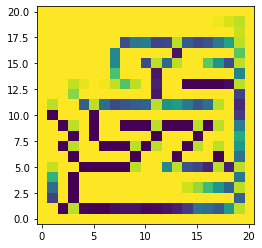

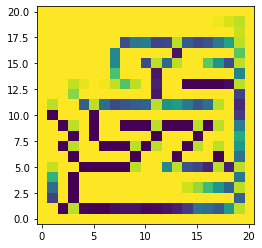

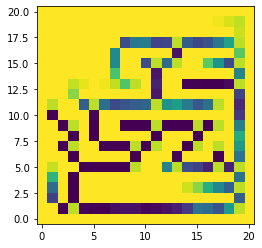

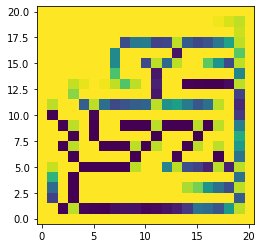

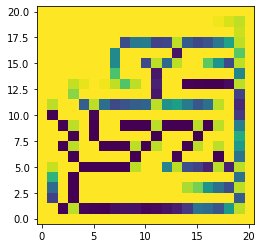

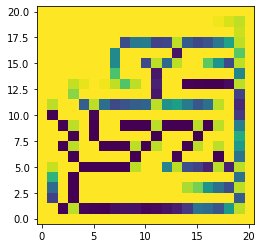

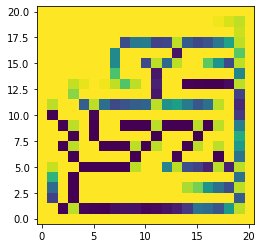

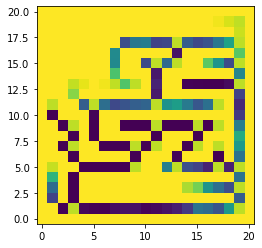

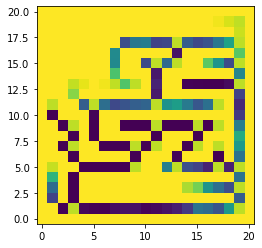

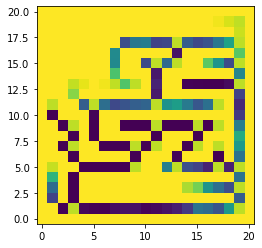

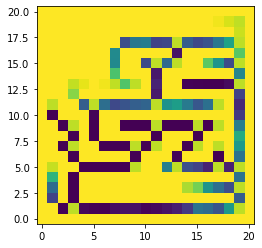

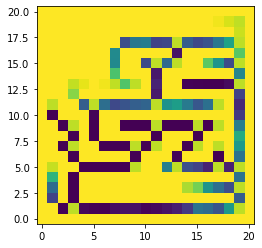

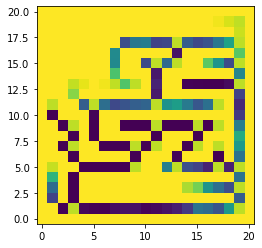

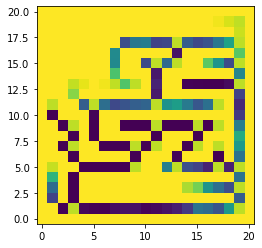

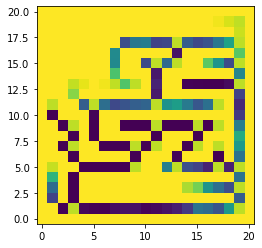

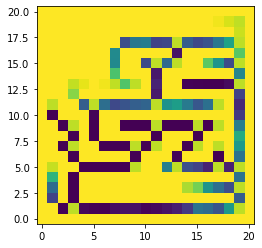

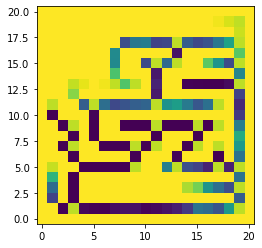

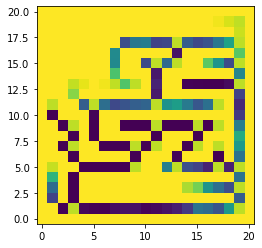

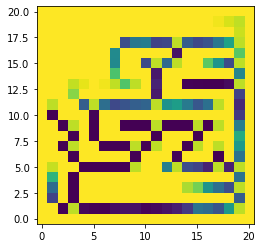

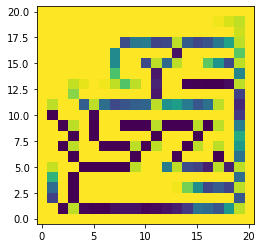

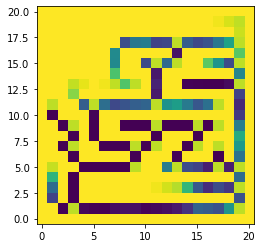

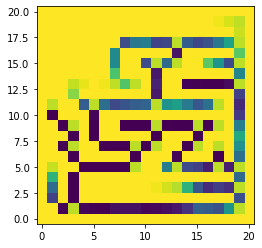

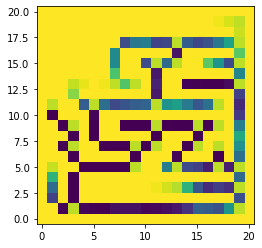

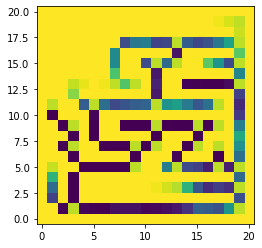

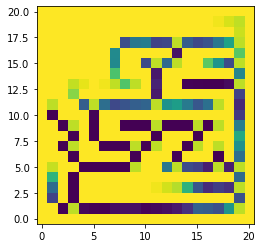

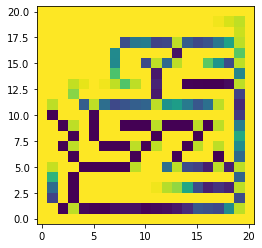

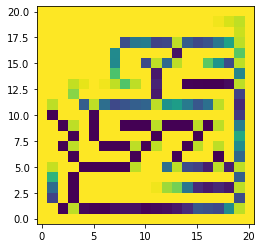

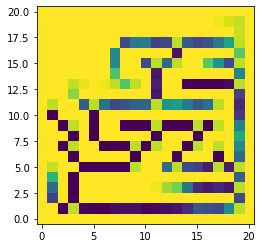

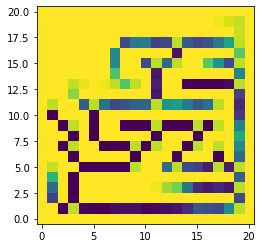

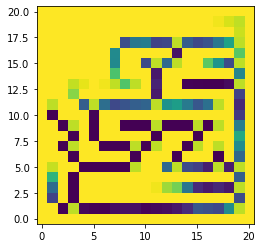

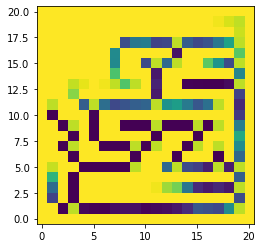

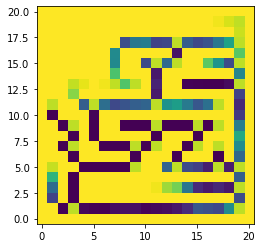

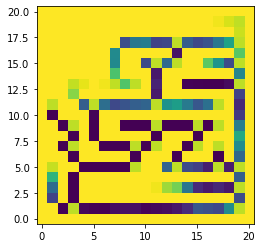

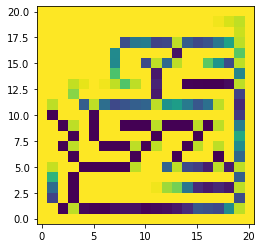

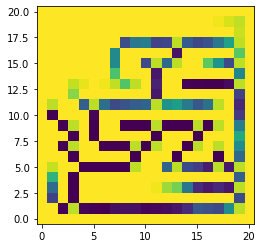

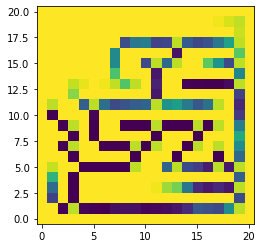

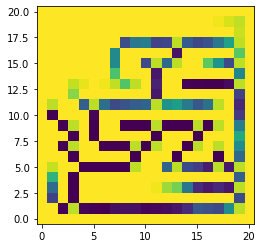

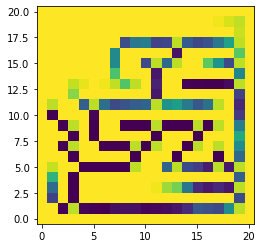

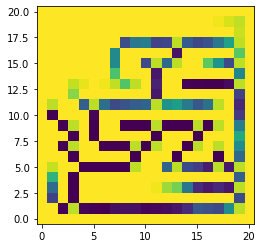

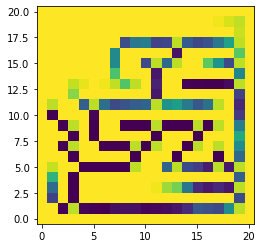

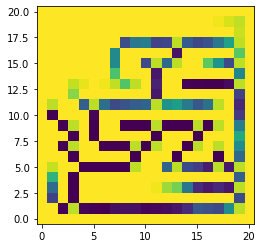

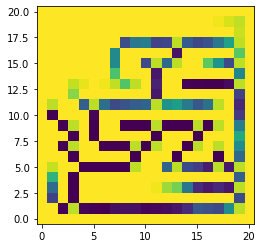

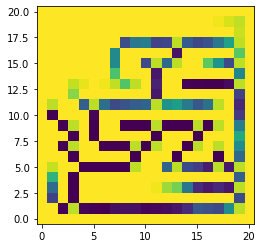

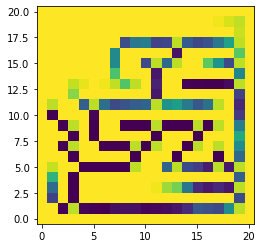

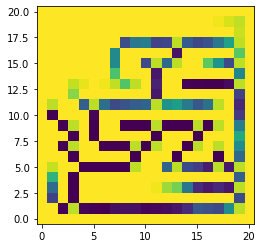

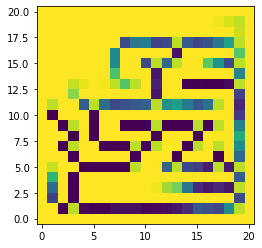

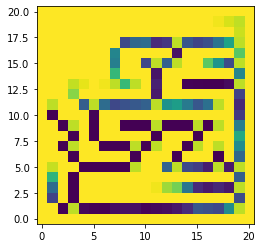

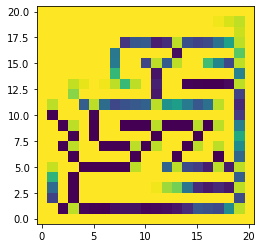

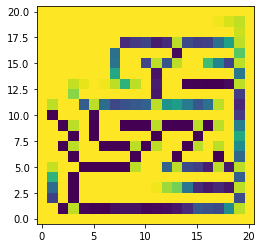

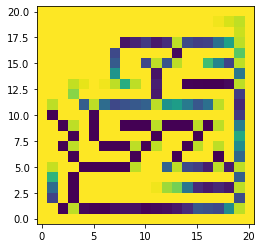

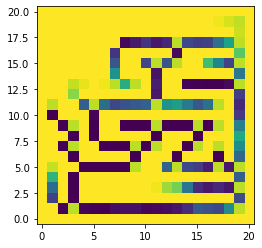

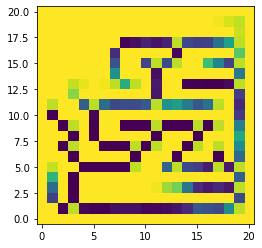

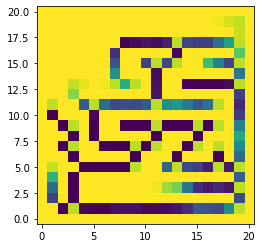

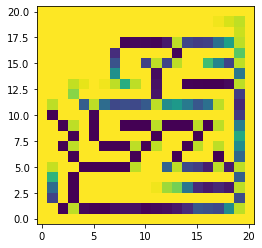

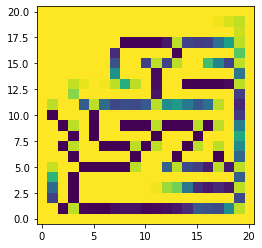

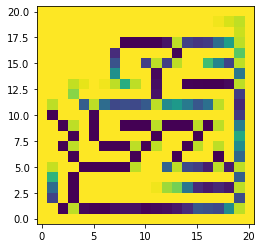

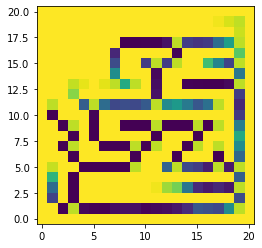

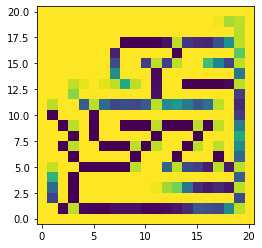

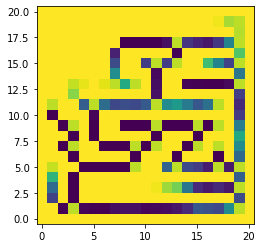

In [14]:
for j in range(shape(Qsave)[0]):
    plt.imshow(Qsave[j,0,:,:],origin='lower')
    plt.show()

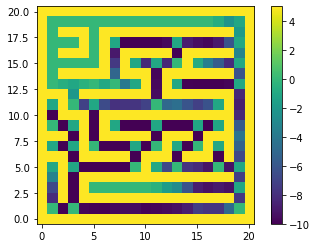

In [15]:
plt.imshow(Q[1,:,:] + 5*lab ,origin='lower')
plt.colorbar()
plt.show()

In [16]:
direction[1]

array([1, 0])